In [ ]:
import pandas as pd
pd.options.display.max_columns = None
import re
import os
import time
from tqdm import tqdm
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from dataset_utilities import value_counts_plus

In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install markupsafe==2.0.1
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install pycaret

from pycaret.anomaly import *
from pycaret.classification import *
from pycaret.clustering import *

In [ ]:
df = pd.read_csv('/content/univ_access_data.zip', compression='zip', header=0, sep=',', quotechar='"', error_bad_lines=False)

In [ ]:
df.head()

,ip,datetime,gmt,request,status,size,referer,browser,country,detected
0,114.125.221.132,01-Jul 2019 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,12133,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
1,114.125.221.132,01-Jul 2019 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,15491,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
2,114.125.221.132,01-Jul 2019 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D...,200.0,16305,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
3,114.125.221.132,01-Jul 2019 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,404.0,1130,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
4,114.125.221.132,01-Jul 2019 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,200.0,1735,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA


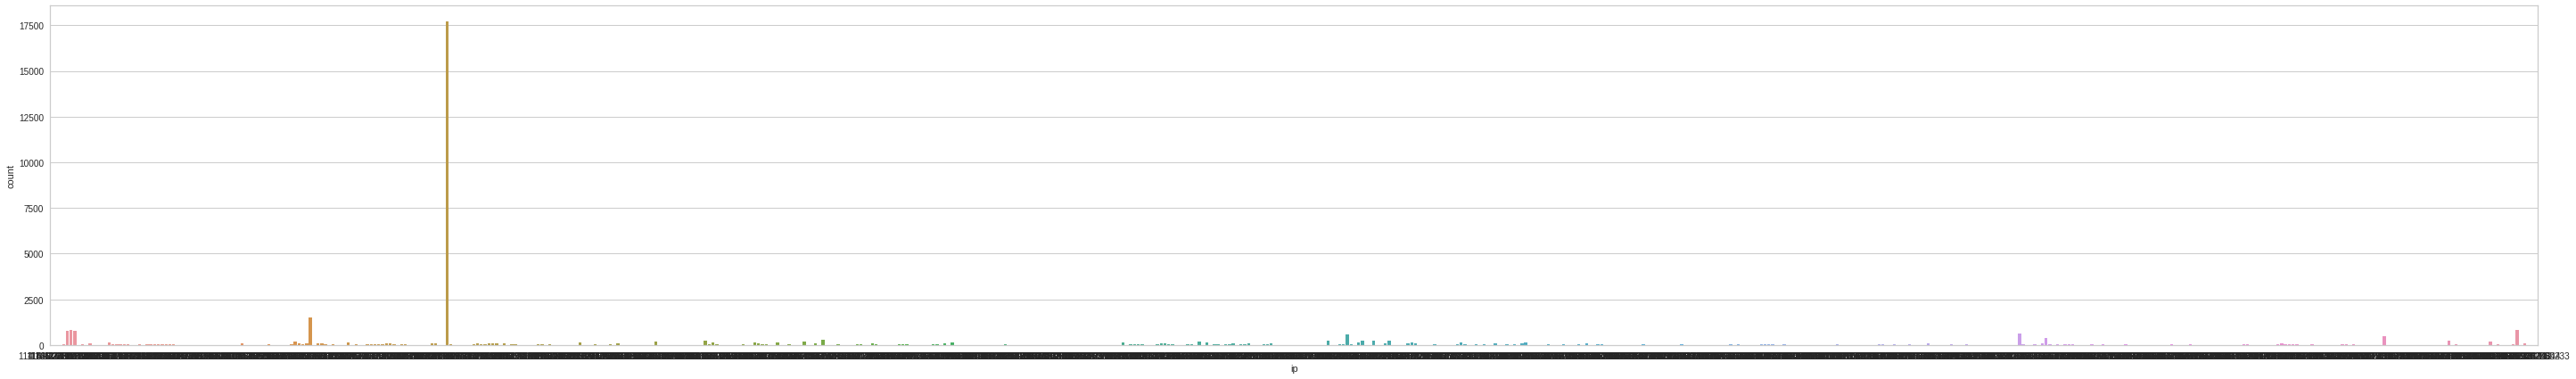

In [ ]:
#Top IPs address

plt.rcParams['figure.figsize'] = (50, 7)
sns.countplot(data = df, x = 'ip')

In [ ]:
df.datetime =pd.to_datetime(df.datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30726 entries, 0 to 37692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ip            30726 non-null  object        
 1   datetime      30726 non-null  datetime64[ns]
 2   gmt           30726 non-null  object        
 3   request       30726 non-null  object        
 4   status        30726 non-null  object        
 5   size          30726 non-null  int16         
 6   referer       30679 non-null  object        
 7   browser       30679 non-null  object        
 8   country       30726 non-null  object        
 9   detected      30726 non-null  object        
 10  refdf_0       30590 non-null  object        
 11  refdf_1       30590 non-null  object        
 12  refdf_2       30342 non-null  object        
 13  referer_labl  30726 non-null  int64         
 14  country_labl  30726 non-null  int64         
 15  detected_lbl  30726 non-null  int64 

In [ ]:
df.describe(include='all')

,ip,datetime,gmt,request,status,size,referer,browser,country,detected
count,37693,37693,37693,37687,37413.000000,37413,36567,36567,37693,37693
unique,655,17766,1,5810,NaN,10694,1347,241,35,3
top,180.178.99.174,24-Jul 2019 9:55:36,+0700],GET /bkd_baru/login HTTP/1.1,NaN,-,http://universitas.com/bkd_baru/home,Mozilla/5.0 (Windows NT 6.3; rv:68.0) Gecko/20...,Indonesia,AMAN
freq,17691,35,37693,895,NaN,6079,4925,3598,32933,29778
mean,NaN,NaN,NaN,NaN,231.855264,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,59.079755,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,206.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Select onlt rows with valid GEt and POSt requests
df=df[(df['request'].str.contains('POST')==True) | (df['request'].str.contains('GET')==True)]

In [ ]:
df.ip.value_counts()

180.178.99.174     17632
180.178.99.180      1513
64.233.173.168       806
207.180.211.248      798
64.233.173.163       793
                   ...  
157.55.39.18           1
114.124.178.140        1
181.112.36.154         1
114.124.196.133        1
182.0.229.90           1
Name: ip, Length: 648, dtype: int64

In [ ]:
#Split request into request type and  request

df.request.str.split(" ")

0        [GET, /bkd_baru/assets/images/scan_sertifikat/...
1        [GET, /bkd_baru/assets/images/scan_sertifikat/...
2        [POST, /bkd_baru/assets/images/scan_sertifikat...
3                  [GET, /bkd_baru/uwubahon.php, HTTP/1.1]
4                  [GET, /bkd_baru/awubahon.php, HTTP/1.1]
                               ...                        
37688    [GET, /bkd_baru/assets/images/scan_kinerja/D00...
37689    [GET, /bkd_baru/assets/images/scan_penugasan/D...
37690    [GET, /bkd_baru/assets/images/scan_kinerja/D00...
37691    [GET, /bkd_baru/assets/images/scan_kinerja/D00...
37692    [GET, /bkd_baru/assets/images/scan_kinerja/D00...
Name: request, Length: 37506, dtype: object

In [ ]:
#df['req_tmp']=pd.DataFrame(df.request.str.split(" "))

In [ ]:
df.head()

,ip,datetime,gmt,request,status,size,referer,browser,country,detected
0,114.125.221.132,2019-07-01 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,12133,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
1,114.125.221.132,2019-07-01 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,15491,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
2,114.125.221.132,2019-07-01 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D...,200.0,16305,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
3,114.125.221.132,2019-07-01 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,404.0,1130,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA
4,114.125.221.132,2019-07-01 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,200.0,1735,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37506 entries, 0 to 37692
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ip        37506 non-null  object        
 1   datetime  37506 non-null  datetime64[ns]
 2   gmt       37506 non-null  object        
 3   request   37506 non-null  object        
 4   status    37226 non-null  float64       
 5   size      37226 non-null  object        
 6   referer   36554 non-null  object        
 7   browser   36554 non-null  object        
 8   country   37506 non-null  object        
 9   detected  37506 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.1+ MB


In [ ]:
#Spliting the request to get request method

ref_df =pd.DataFrame(np.array(df.request.str.split(" ")),columns={'A'})
ref_df =pd.DataFrame(ref_df.A.tolist(),index=ref_df.index)
ref_df=ref_df.add_prefix('refdf_')
ref_df.head()

,refdf_0,refdf_1,refdf_2
0,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application,HTTP/1.1
1,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,HTTP/1.1
2,POST,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,HTTP/1.1
3,GET,/bkd_baru/uwubahon.php,HTTP/1.1
4,GET,/bkd_baru/awubahon.php,HTTP/1.1


In [ ]:
#df.drop(columns='req_tmp',inplace=True)

KeyError: ignored

In [ ]:
#Merge request data with main DF

df = pd.concat([df,ref_df],axis=1)


In [ ]:
df.head()

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2
0,114.125.221.132,2019-07-01 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,12133,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_...,HTTP/1.1
1,114.125.221.132,2019-07-01 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,15491,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_...,HTTP/1.1
2,114.125.221.132,2019-07-01 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D...,200.0,16305,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA,POST,/bkd_baru/assets/images/scan_sertifikat/D0001_...,HTTP/1.1
3,114.125.221.132,2019-07-01 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,404.0,1130,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA,GET,/bkd_baru/uwubahon.php,HTTP/1.1
4,114.125.221.132,2019-07-01 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,200.0,1735,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,BAHAYA,GET,/bkd_baru/awubahon.php,HTTP/1.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37693 entries, 0 to 37692
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ip        37506 non-null  object        
 1   datetime  37506 non-null  datetime64[ns]
 2   gmt       37506 non-null  object        
 3   request   37506 non-null  object        
 4   status    37226 non-null  float64       
 5   size      37226 non-null  object        
 6   referer   36554 non-null  object        
 7   browser   36554 non-null  object        
 8   country   37506 non-null  object        
 9   detected  37506 non-null  object        
 10  refdf_0   37506 non-null  object        
 11  refdf_1   37506 non-null  object        
 12  refdf_2   37225 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 4.0+ MB


In [ ]:
#Convert status to string 


df['status'] = df['status'].apply(str)

In [ ]:
#replace values for EDA

In [ ]:
# Replace the values with meaningful values
df['detected'] =df['detected'].replace(to_replace='AMAN',value='SAFE')
df['detected'] =df['detected'].replace(to_replace='BAHAYA',value='DANGER')
df['detected'] =df['detected'].replace(to_replace='DICURIGAI',value='SUSPECTED')

In [ ]:
#Cleaning the size column from the misplaced values
#df=df[df['size'].str.contains('Mozilla')==False]
#df=df[df['size'].str.contains('ia')==False]
#df=df[df['size'].str.contains('Dav')==False]
#df=df[df['size'].str.contains('-')==False]
df=df[pd.to_numeric(df['size'], errors='coerce').notnull()]


In [ ]:
#Fill blank Sizes with zero

df['size'] = df['size'].fillna(0)

In [ ]:
#Formatting tge data 
df['size'] =df['size'].astype('int16')
df['size'] =df['size'].abs()

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['referer_labl']= label_encoder.fit_transform(df['referer'].astype(str))
# Encode labels in column 'species'.
df['country_labl']= label_encoder.fit_transform(df['country'].astype(str))
df['detected_lbl']= label_encoder.fit_transform(df['detected'])
df['method_labl']= label_encoder.fit_transform(df['refdf_0'].astype(str))

In [ ]:
df[df['size'].abs() <0]

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2,referer_labl,country_labl,detected_lbl,method_labl
6458,180.178.99.174,2019-07-23 11:28:17,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/file/Pendidikan-min.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/assets/js/jquery-ui.custom.js,HTTP/1.1,649,8,1,0
6459,180.178.99.174,2019-07-23 11:28:17,+0700],GET /bkd_baru/assets/images/scan_penugasan/D0096__19-07-19_03.22_SK_PENELITIAN_2018.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/images/scan_penugasan/D0096__19-07-19_03.22_SK_PENELITIAN_2018.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/assets/js/dataTables/jquery.dataTables.bootstrap.js,HTTP/1.1,674,8,1,0
6471,180.178.99.174,2019-07-23 11:28:18,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/file/Pendidikan-min.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/assets/js/sweetalert/dist/sweetalert.min.js,HTTP/1.1,649,8,1,0
6554,180.178.99.174,2019-07-23 11:30:00,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/file/Pendidikan-min.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/Atur_kelompok/get_autocomplete?term=rod,HTTP/1.1,649,8,1,0
6574,180.178.99.174,2019-07-23 11:30:23,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/file/Pendidikan-min.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/assets/images/scan_kinerja/D0283__19-07-19_15.08_5198-13648-1-PB1.pdf,HTTP/1.1,649,8,1,0
6878,180.178.99.174,2019-07-23 11:46:40,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/file/Pendidikan-min.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/Bidang_pendidikan,HTTP/1.1,649,8,1,0
6917,180.178.99.174,2019-07-23 11:48:43,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/file/Pendidikan-min.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/assets/file/Pendidikan-min.pdf,HTTP/1.1,649,8,1,0
7994,180.178.99.174,2019-07-23 12:49:58,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/file/Pendidikan-min.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,POST,/bkd_baru/bidang_pendidikan/do_tambah,HTTP/1.1,649,8,1,1
25333,114.124.230.203,2019-07-25 04:28:02,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0080_17-07-2019_S31.pdf HTTP/1.1,200.0,-32768,http://universitas.com/bkd_baru/dosen/input_dosen/,Mozilla/5.0 (iPhone; CPU iPhone OS 12_0_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML,Indonesia,SAFE,GET,/bkd_baru/kinerja_dosen/rekap_kinerja/D0163,HTTP/1.1,1118,8,1,0
31585,180.178.99.174,2019-07-25 12:54:13,+0700],GET /bkd_baru/assets/images/scan_kinerja/D0150__14-07-19_18.35_2019_manajMM-dikompresi.pdf HTTP/1.1,206.0,-32768,http://universitas.com/bkd_baru/assets/images/scan_kinerja/D0150__14-07-19_18.35_2019_manajMM-dikompresi.pdf,Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,Indonesia,SAFE,GET,/bkd_baru/kinerja_dosen,HTTP/1.1,661,8,1,0


### EDA


In [ ]:
df.describe(include='all')

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2,referer_labl,country_labl,detected_lbl,method_labl
count,30726,30726,30726,30726,30726,30726.000000,30679,30679,30726,30726,30590,30590,30342,30726.000000,30726.000000,30726.000000,30726.000000
unique,542,15754,1,5258,6,NaN,1344,232,21,3,2,5171,3,NaN,NaN,NaN,NaN
top,180.178.99.174,2019-07-24 09:54:58,+0700],GET /bkd_baru/login HTTP/1.1,200.0,NaN,http://universitas.com/bkd_baru/home,Mozilla/5.0 (Windows NT 6.3; rv:68.0) Gecko/20100101 Firefox/68.0,Indonesia,SAFE,GET,/bkd_baru/login,HTTP/1.1,NaN,NaN,NaN,NaN
freq,14681,35,30726,876,22266,NaN,4373,3385,26618,23933,27507,706,30304,NaN,NaN,NaN,NaN
first,NaN,2019-07-01 10:54:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-07-27 08:06:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,15472.123413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819.239862,8.915609,0.936178,0.109191
std,NaN,NaN,NaN,NaN,NaN,10617.026045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433.051023,3.415649,0.465851,0.325767
min,NaN,NaN,NaN,NaN,NaN,-32768.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,5198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622.000000,8.000000,1.000000,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30726 entries, 0 to 37692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ip            30726 non-null  object        
 1   datetime      30726 non-null  datetime64[ns]
 2   gmt           30726 non-null  object        
 3   request       30726 non-null  object        
 4   status        30726 non-null  object        
 5   size          30726 non-null  int16         
 6   referer       30679 non-null  object        
 7   browser       30679 non-null  object        
 8   country       30726 non-null  object        
 9   detected      30726 non-null  object        
 10  refdf_0       30590 non-null  object        
 11  refdf_1       30590 non-null  object        
 12  refdf_2       30342 non-null  object        
 13  referer_labl  30726 non-null  int64         
 14  country_labl  30726 non-null  int64         
 15  detected_lbl  30726 non-null  int64 

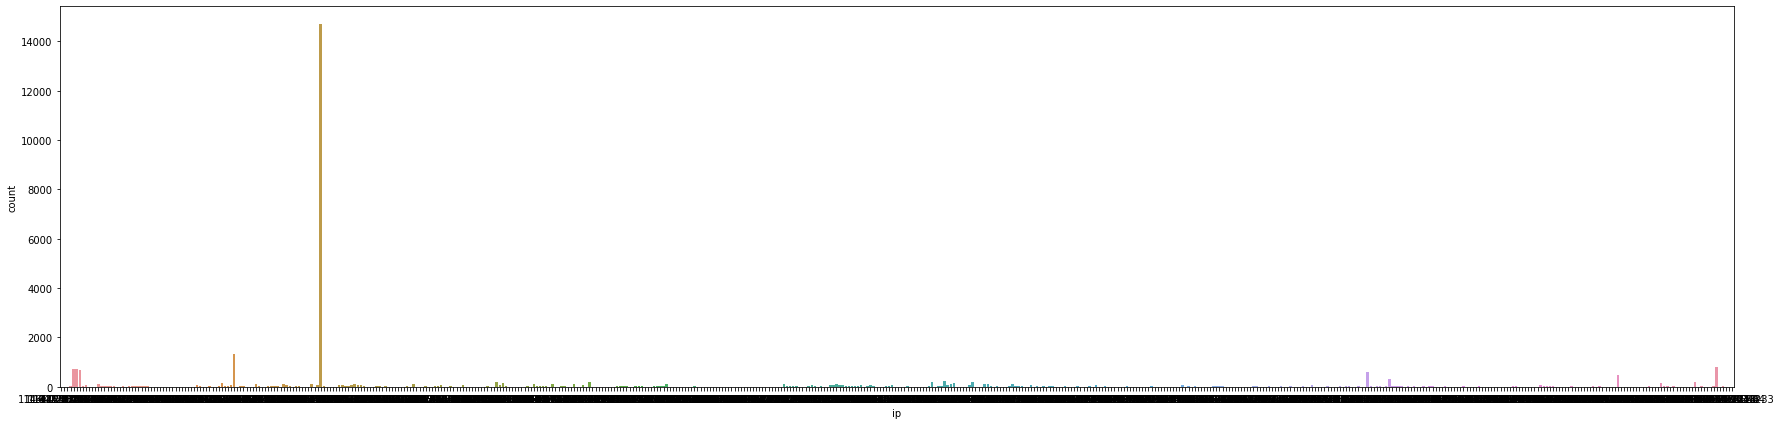

In [ ]:
#Top IPs address

plt.rcParams['figure.figsize'] = (30, 7)
sns.countplot(data = df, x = 'ip')

In [ ]:
df[df['ip']== '180.178.99.174'].count()

ip              14681
datetime        14681
gmt             14681
request         14681
status          14681
size            14681
referer         14681
browser         14681
country         14681
detected        14681
refdf_0         14681
refdf_1         14681
refdf_2         14491
referer_labl    14681
country_labl    14681
detected_lbl    14681
method_labl     14681
dtype: int64

In [ ]:
#Top IPs address

plt.rcParams['figure.figsize'] = (50, 7)
sns.countplot(data = df, x = 'ip')

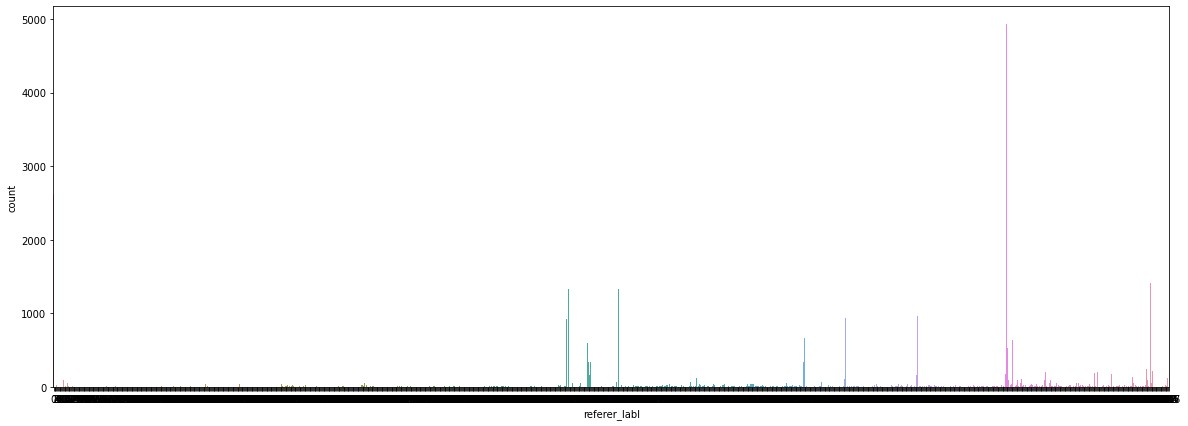

In [ ]:
#Top IPs address

plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = df, x = 'referer_labl')

In [ ]:
df['referer_labl'].value_counts()

1151    4925
0       2615
21      2435
1325    1409
622     1333
        ... 
1142       1
668        1
15         1
1133       1
658        1
Name: referer_labl, Length: 1348, dtype: int64

In [ ]:
## Top reffered url accessed 492 times in the data set
df[df['referer_labl']==1151]['referer'].unique()

array(['http://universitas.com/bkd_baru/home'], dtype=object)

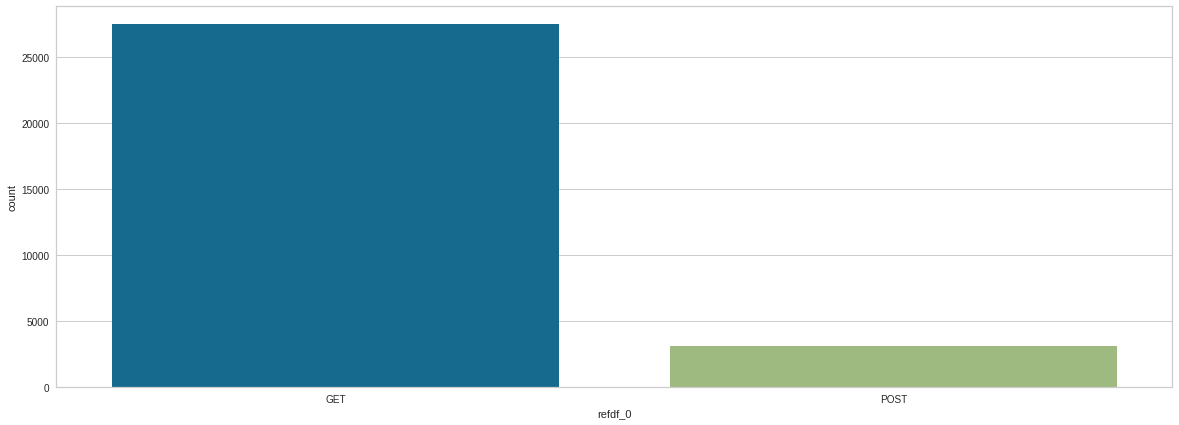

In [ ]:
#Top request methods 

plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = df, x = 'refdf_0')

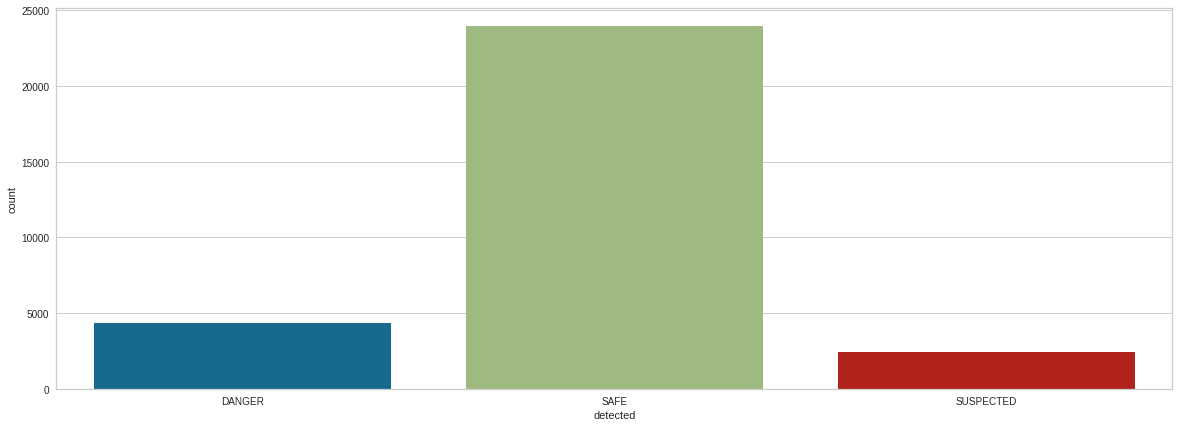

In [ ]:
#Top Labels in the dataset address

plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = df, x = 'detected')

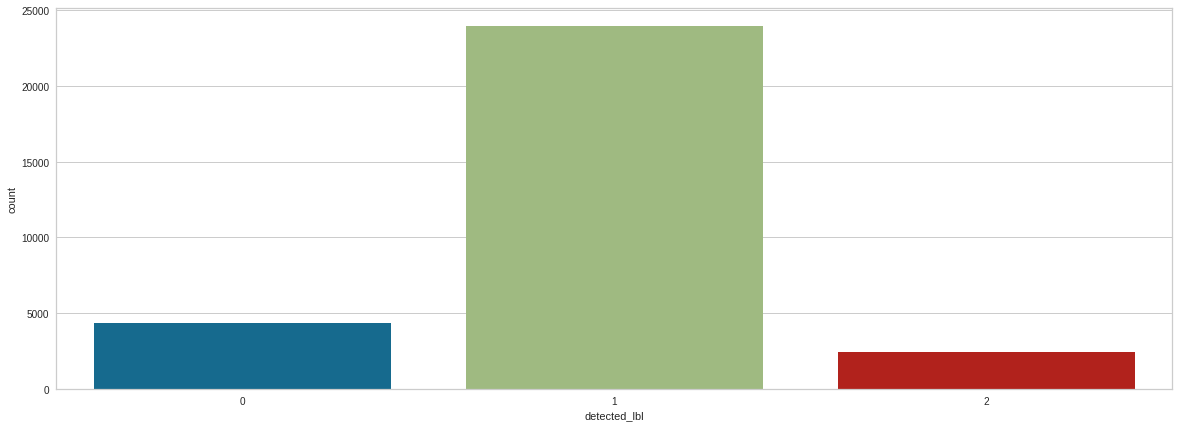

In [ ]:
#Top Labels in the dataset address

plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = df, x = 'detected_lbl')

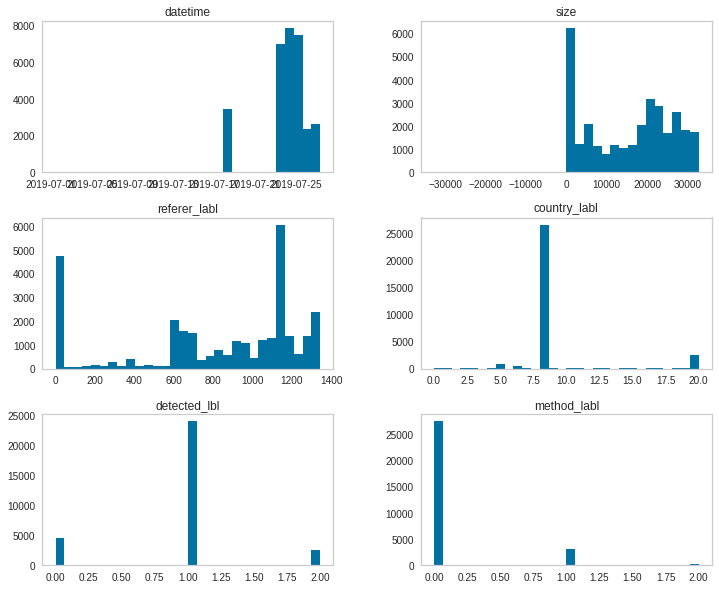

In [ ]:
df.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

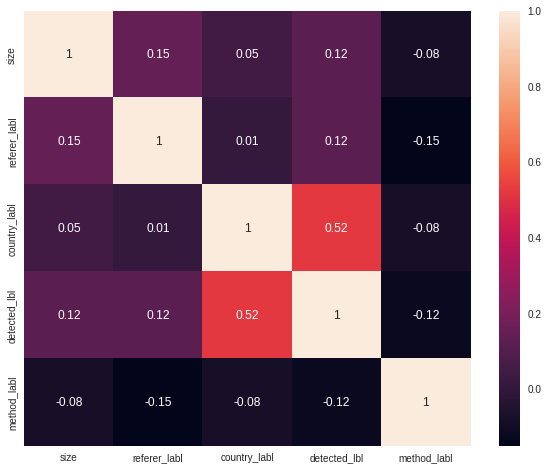

In [ ]:
#High correlation between country and dectection is observed

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(decimals=2), annot=True)
plt.show()

In [ ]:
df = df.reset_index()

### Feature Engineering

In [ ]:
## Features
# distint sessions
# duration of session
# average time for the session
# average of the information
# number of calls - 1 hot encoder


df_f = df.copy()


In [ ]:
df_f.head()

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2,referer_labl,country_labl,detected_lbl,method_labl
0,114.125.221.132,2019-07-01 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application HTTP/1.1,200.0,12133,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application,HTTP/1.1,677,8,0,0
1,114.125.221.132,2019-07-01 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1,200.0,15491,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,HTTP/1.1,678,8,0,0
2,114.125.221.132,2019-07-01 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1,200.0,16305,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,POST,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,HTTP/1.1,677,8,0,1
3,114.125.221.132,2019-07-01 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,404.0,1130,-,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/uwubahon.php,HTTP/1.1,0,8,0,0
4,114.125.221.132,2019-07-01 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,200.0,1735,-,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/awubahon.php,HTTP/1.1,0,8,0,0


In [ ]:
df_f.groupby(['ip'])['datetime'].diff()

0                   NaT
1       0 days 00:00:08
2       0 days 00:00:19
3       0 days 00:00:26
4       0 days 00:00:20
              ...      
37688   0 days 00:00:38
37689   0 days 00:01:43
37690   0 days 00:00:27
37691   0 days 00:00:17
37692   0 days 00:00:12
Name: datetime, Length: 30726, dtype: timedelta64[ns]

In [ ]:


idx_lst=df_f[df['ip']=='103.87.78.122'].sort_values(by=['datetime']).groupby(['ip'])['datetime'].diff().index.tolist 



Int64Index([1141, 14011, 25366], dtype='int64')

In [ ]:
df_f[df['ip']=='103.87.78.122'].sort_values(by=['datetime']).groupby(['ip'])['datetime'].diff()

1141                NaT
14011   5 days 21:55:07
25366   1 days 00:35:32
Name: datetime, dtype: timedelta64[ns]

In [ ]:
df_f.groupby(['ip'])['datetime'].diff()

0                   NaT
1       0 days 00:00:08
2       0 days 00:00:19
3       0 days 00:00:26
4       0 days 00:00:20
              ...      
37688   0 days 00:00:38
37689   0 days 00:01:43
37690   0 days 00:00:27
37691   0 days 00:00:17
37692   0 days 00:00:12
Name: datetime, Length: 30726, dtype: timedelta64[ns]

In [ ]:
ses_cn=0 #Set the session count as 1

idx_lst=df_f[df['ip']=='103.87.78.122'].sort_values(by=['datetime']).groupby(['ip'])['datetime'].diff().index.tolist() 
cnt=0
for j in df_f[df['ip']=='103.87.78.122'].groupby(['ip'])['datetime'].diff():
    print(idx_lst[cnt])
    
    if (j is pd.NaT) :
      ses_cn= ses_cn+1
    if (j  > np.timedelta64(5,'m')):  
      ses_cn= ses_cn+1
      print('session id:',ses_cn, j,idx_lst[cnt] )
    else: 
      print('session id:',ses_cn, j,idx_lst[cnt])
    cnt=cnt+1

1141
session id: 1 NaT 1141
14011
session id: 2 5 days 21:55:07 14011
25366
session id: 3 1 days 00:35:32 25366


In [ ]:
ses_cn=0 #Set the session count as 1
for j in df_f[df['ip']=='94.180.140.84'].groupby(['ip'])['datetime'].diff():
    if (j is pd.NaT) :
      ses_cn= ses_cn+1
    if (j  > np.timedelta64(5,'m')):  
      ses_cn= ses_cn+1
      print('session id:',ses_cn, j)
    else: 
      print('session id:',ses_cn, j)

session id: 1 NaT
session id: 1 0 days 00:00:02
session id: 1 0 days 00:00:00
session id: 1 0 days 00:00:00
session id: 1 0 days 00:00:00
session id: 1 0 days 00:00:00
session id: 1 0 days 00:00:11
session id: 1 0 days 00:00:03


In [ ]:
#Get unique Ips for this data

ses_cn=0 #Set the session count as 1
l=[]
for i in df_f.ip.unique():
  #print (i)
  idx_lst=df_f[df['ip']==i].sort_values(by=['datetime']).groupby(['ip'])['datetime'].diff().index.tolist() 
  cnt=0
  for j in df_f[df['ip']==i].groupby(['ip'])['datetime'].diff():
    if (j is pd.NaT) :
      ses_cn= ses_cn+1
    if (j  > np.timedelta64(5,'m')):  
      ses_cn= ses_cn+1
      #print('session id:',ses_cn, j)
    #else: 
      #print('session id:',ses_cn, j)
    l.append([ses_cn,idx_lst[cnt],i])
    cnt=cnt+1

print(l)

[[1, 0, '114.125.221.132'], [1, 1, '114.125.221.132'], [1, 2, '114.125.221.132'], [1, 3, '114.125.221.132'], [1, 4, '114.125.221.132'], [1, 5, '114.125.221.132'], [2, 7, '114.125.207.5'], [2, 8, '114.125.207.5'], [3, 9, '114.124.140.168'], [3, 10, '114.124.140.168'], [3, 12, '114.124.140.168'], [3, 14, '114.124.140.168'], [3, 22, '114.124.140.168'], [3, 47, '114.124.140.168'], [4, 107, '114.124.140.168'], [5, 11, '114.124.172.136'], [5, 13, '114.124.172.136'], [5, 23, '114.124.172.136'], [5, 61, '114.124.172.136'], [5, 62, '114.124.172.136'], [5, 66, '114.124.172.136'], [5, 72, '114.124.172.136'], [5, 76, '114.124.172.136'], [5, 88, '114.124.172.136'], [5, 92, '114.124.172.136'], [5, 101, '114.124.172.136'], [5, 106, '114.124.172.136'], [5, 108, '114.124.172.136'], [5, 109, '114.124.172.136'], [5, 116, '114.124.172.136'], [6, 15, '64.233.173.163'], [6, 21, '64.233.173.163'], [6, 25, '64.233.173.163'], [6, 26, '64.233.173.163'], [6, 29, '64.233.173.163'], [6, 31, '64.233.173.163'], [6, 

In [ ]:
session_df= pd.DataFrame(l,columns=['session_id','index','ip'])

In [ ]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30726 entries, 0 to 30725
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   session_id  30726 non-null  int64 
 1   index       30726 non-null  int64 
 2   ip          30726 non-null  object
dtypes: int64(2), object(1)
memory usage: 720.3+ KB


In [ ]:
session_df.isna().sum()

session_id    0
index         0
ip            0
dtype: int64

In [ ]:
session_df=session_df.set_index('index')

In [ ]:
session_df[session_df['ip']=="36.79.254.33"]

,session_id,ip
index,,
37526,1186,36.79.254.33
37528,1186,36.79.254.33
37530,1186,36.79.254.33
37541,1186,36.79.254.33
37550,1186,36.79.254.33
37551,1186,36.79.254.33
37556,1186,36.79.254.33
37563,1186,36.79.254.33
37564,1186,36.79.254.33


In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30726 entries, 0 to 30725
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         30726 non-null  int64         
 1   ip            30726 non-null  object        
 2   datetime      30726 non-null  datetime64[ns]
 3   gmt           30726 non-null  object        
 4   request       30726 non-null  object        
 5   status        30726 non-null  object        
 6   size          30726 non-null  int16         
 7   referer       30679 non-null  object        
 8   browser       30679 non-null  object        
 9   country       30726 non-null  object        
 10  detected      30726 non-null  object        
 11  refdf_0       30590 non-null  object        
 12  refdf_1       30590 non-null  object        
 13  refdf_2       30342 non-null  object        
 14  referer_labl  30726 non-null  int64         
 15  country_labl  30726 non-null  int64 

In [ ]:
df_f

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2,referer_labl,country_labl,detected_lbl,method_labl
0,114.125.221.132,2019-07-01 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,12133,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,DANGER,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_...,HTTP/1.1,677,8,0,0
1,114.125.221.132,2019-07-01 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0...,200.0,15491,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,DANGER,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_...,HTTP/1.1,678,8,0,0
2,114.125.221.132,2019-07-01 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D...,200.0,16305,http://universitas.com/bkd_baru/assets/images/...,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,DANGER,POST,/bkd_baru/assets/images/scan_sertifikat/D0001_...,HTTP/1.1,677,8,0,1
3,114.125.221.132,2019-07-01 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,404.0,1130,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,DANGER,GET,/bkd_baru/uwubahon.php,HTTP/1.1,0,8,0,0
4,114.125.221.132,2019-07-01 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,200.0,1735,-,Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Bu...,Indonesia,DANGER,GET,/bkd_baru/awubahon.php,HTTP/1.1,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37688,36.79.254.33,2019-07-27 08:04:15,+0700],GET /bkd_baru/assets/images/scan_kinerja/D0010...,200.0,9711,http://universitas.com/bkd_baru/kinerja_dosen/...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Indonesia,SAFE,NaN,NaN,NaN,1162,8,1,2
37689,36.79.254.33,2019-07-27 08:05:58,+0700],GET /bkd_baru/assets/images/scan_penugasan/D00...,200.0,18669,http://universitas.com/bkd_baru/kinerja_dosen/...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Indonesia,SAFE,NaN,NaN,NaN,1162,8,1,2
37690,36.79.254.33,2019-07-27 08:06:25,+0700],GET /bkd_baru/assets/images/scan_kinerja/D0010...,200.0,-8888,http://universitas.com/bkd_baru/kinerja_dosen/...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Indonesia,SAFE,NaN,NaN,NaN,1162,8,1,2
37691,36.79.254.33,2019-07-27 08:06:42,+0700],GET /bkd_baru/assets/images/scan_kinerja/D0010...,200.0,-26310,http://universitas.com/bkd_baru/kinerja_dosen/...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Indonesia,SAFE,NaN,NaN,NaN,1162,8,1,2


In [ ]:

df_f = pd.concat([df_f,session_df['session_id']],axis=1)
df_f.head()

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2,referer_labl,country_labl,detected_lbl,method_labl,session_id
0,114.125.221.132,2019-07-01 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application HTTP/1.1,200.0,12133,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application,HTTP/1.1,677,8,0,0,1
1,114.125.221.132,2019-07-01 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1,200.0,15491,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,HTTP/1.1,678,8,0,0,1
2,114.125.221.132,2019-07-01 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1,200.0,16305,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,POST,/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,HTTP/1.1,677,8,0,1,1
3,114.125.221.132,2019-07-01 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,404.0,1130,-,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/uwubahon.php,HTTP/1.1,0,8,0,0,1
4,114.125.221.132,2019-07-01 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,200.0,1735,-,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,/bkd_baru/awubahon.php,HTTP/1.1,0,8,0,0,1


In [ ]:
#check session Id
df_f[df_f['ip']=='103.108.128.50']

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2,referer_labl,country_labl,detected_lbl,method_labl,session_id
11811,103.108.128.50,2019-07-23 17:55:03,+0700],GET /bkd_baru/ HTTP/1.1,200.0,5198,-,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/bidang_penelitian,HTTP/1.1,0,8,1,0,578
11812,103.108.128.50,2019-07-23 17:55:04,+0700],GET /bkd_baru/assets/css/bootstrap.css HTTP/1.1,200.0,3866,http://universitas.com/bkd_baru/,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,POST,/bkd_baru/bidang_pendidikan/do_tambah,HTTP/1.1,21,8,1,1,578
11813,103.108.128.50,2019-07-23 17:55:04,+0700],GET /bkd_baru/assets/css/font-awesome.css HTTP/1.1,200.0,26651,http://universitas.com/bkd_baru/,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/Bidang_pendidikan,HTTP/1.1,21,8,1,0,578
11814,103.108.128.50,2019-07-23 17:55:04,+0700],GET /bkd_baru/assets/css/ace-fonts.css HTTP/1.1,200.0,452,http://universitas.com/bkd_baru/,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/bidang_pendidikan,HTTP/1.1,21,8,1,0,578
11815,103.108.128.50,2019-07-23 17:55:04,+0700],GET /bkd_baru/assets/css/ace-rtl.css HTTP/1.1,200.0,21129,http://universitas.com/bkd_baru/,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/bidang_penunjang,HTTP/1.1,21,8,1,0,578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,103.108.128.50,2019-07-23 19:06:36,+0700],GET /bkd_baru/bidang_pendidikan/edit/ODQwNA HTTP/1.1,200.0,30867,http://universitas.com/bkd_baru/Bidang_pendidikan,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/assets/images/scan_penugasan/D0156__19-07-19_09.30_Saifuddin_SKMengajar.pdf,HTTP/1.1,622,8,1,0,580
12486,103.108.128.50,2019-07-23 19:06:49,+0700],GET /bkd_baru/Bidang_pendidikan HTTP/1.1,200.0,30628,http://universitas.com/bkd_baru/bidang_pendidikan/edit/ODQwMw,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/assets/images/scan_penugasan/D0156__19-07-19_09.30_Saifuddin_SKMengajar.pdf,HTTP/1.1,702,8,1,0,580
12487,103.108.128.50,2019-07-23 19:06:55,+0700],GET /bkd_baru/bidang_pendidikan/edit/ODQwMw HTTP/1.1,200.0,30893,http://universitas.com/bkd_baru/Bidang_pendidikan,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/assets/images/scan_penugasan/D0156__19-07-19_09.30_Saifuddin_SKMengajar.pdf,HTTP/1.1,622,8,1,0,580
12488,103.108.128.50,2019-07-23 19:07:08,+0700],GET /bkd_baru/Bidang_pendidikan HTTP/1.1,200.0,30628,http://universitas.com/bkd_baru/bidang_pendidikan/edit/ODQwMA,Mozilla/5.0 (Windows NT 6.1; rv:61.0) Gecko/20100101 Firefox/61.0,Indonesia,SAFE,GET,/bkd_baru/assets/images/scan_penugasan/D0156__19-07-19_09.30_Saifuddin_SKMengajar.pdf,HTTP/1.1,701,8,1,0,580


In [ ]:
df_f['session_id'].isna().sum()

0

In [ ]:
## One hot encoding for label values
## status , country_labl,detected_lbl,method_lbl,referer_labl

catcolns= ['status','method_labl','referer_labl']


In [ ]:
df_feature=pd.get_dummies(df_f, columns = catcolns)

In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30726 entries, 0 to 37692
Columns: 1369 entries, ip to referer_labl_1344
dtypes: datetime64[ns](1), int16(1), int64(3), object(10), uint8(1354)
memory usage: 43.3+ MB


In [ ]:
pd. set_option('display.width', None)
pd. set_option('display.max_columns', None)
pd. set_option('display.max_colwidth', None)

In [ ]:
feature_cols = df_feature.columns

In [ ]:
df_feature.head()

,ip,datetime,gmt,request,size,referer,browser,country,detected,refdf_0,...,referer_labl_1335,referer_labl_1336,referer_labl_1337,referer_labl_1338,referer_labl_1339,referer_labl_1340,referer_labl_1341,referer_labl_1342,referer_labl_1343,referer_labl_1344
0,114.125.221.132,2019-07-01 10:54:15,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application HTTP/1.1,12133,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,...,0,0,0,0,0,0,0,0,0,0
1,114.125.221.132,2019-07-01 10:54:23,+0700],GET /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1,15491,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru/application,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,...,0,0,0,0,0,0,0,0,0,0
2,114.125.221.132,2019-07-01 10:54:42,+0700],POST /bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru HTTP/1.1,16305,http://universitas.com/bkd_baru/assets/images/scan_sertifikat/D0001_30-06-2019_nyil.php?path=C:/xampp/htdocs/bkd_baru,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,POST,...,0,0,0,0,0,0,0,0,0,0
3,114.125.221.132,2019-07-01 10:55:08,+0700],GET /bkd_baru/uwubahon.php HTTP/1.1,1130,-,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,...,0,0,0,0,0,0,0,0,0,0
4,114.125.221.132,2019-07-01 10:55:28,+0700],GET /bkd_baru/awubahon.php HTTP/1.1,1735,-,"Mozilla/5.0 (Linux; Android 5.1.1; SM-J111F Build/LMY47V) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.91 Mobile Safari/537.36",Indonesia,DANGER,GET,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Drop cat label columnscolumns 

len(feature_cols)

1389

In [ ]:

#Create tge feature engineered data

df_feature = df_feature.groupby(['ip', 'country_labl','detected','session_id','status_200.0',	'status_206.0',	'status_301.0',	'status_400.0',	'status_403.0',	'status_404.0','method_labl_0',	'method_labl_1',	'method_labl_2']).agg(reqstcnt=('session_id','count'),
                                                                                                                                           avg_size=('size','mean'),
                                                                                                                                           min_size=('size','min'),
                                                                                                                                           max_size=('size','max'),
                                                                                                                                           tol_size=('size','sum'),
                                                                                                                                           min_time=('datetime','min'),
                                                                                                                                           max_time=('datetime','max')).reset_index()


In [ ]:
#Create features for understanding the data

df_feature['total_time'] = (df_feature['max_time'] -df_feature['min_time'])/np.timedelta64(1,'s')
df_feature['avg_time'] = df_feature['total_time']/df_feature['reqstcnt']
df_feature['avg_size'] = df_feature['tol_size']/df_feature['reqstcnt']

In [ ]:
df_feature.head(20)

,ip,country_labl,detected,session_id,status_200.0,status_206.0,status_301.0,status_400.0,status_403.0,status_404.0,...,method_labl_2,reqstcnt,avg_size,min_size,max_size,tol_size,min_time,max_time,total_time,avg_time
0,101.89.19.197,2,SUSPECTED,1086,1,0,0,0,0,0,...,0,1,5198.000000,5198,5198,5198.0,2019-07-26 17:01:30,2019-07-26 17:01:30,0.0,0.000000
1,101.91.60.109,2,SUSPECTED,984,1,0,0,0,0,0,...,0,1,5198.000000,5198,5198,5198.0,2019-07-25 10:44:59,2019-07-25 10:44:59,0.0,0.000000
2,101.91.60.11,2,SUSPECTED,1088,1,0,0,0,0,0,...,0,1,5198.000000,5198,5198,5198.0,2019-07-26 17:04:25,2019-07-26 17:04:25,0.0,0.000000
3,101.91.60.110,2,SUSPECTED,1087,1,0,0,0,0,0,...,0,1,5198.000000,5198,5198,5198.0,2019-07-26 17:03:06,2019-07-26 17:03:06,0.0,0.000000
4,103.103.146.58,8,SAFE,1050,0,1,0,0,0,0,...,0,12,15934.916667,386,28873,191219.0,2019-07-25 21:09:46,2019-07-25 21:44:15,2069.0,172.416667
5,103.103.146.58,8,SAFE,1050,0,1,0,0,0,0,...,0,399,17461.912281,31,32688,6967303.0,2019-07-25 20:48:38,2019-07-25 21:44:19,3341.0,8.373434
6,103.103.146.58,8,SAFE,1050,1,0,0,0,0,0,...,0,3,15037.333333,7610,29170,45112.0,2019-07-25 20:48:36,2019-07-25 21:43:09,3273.0,1091.000000
7,103.103.146.58,8,SAFE,1050,1,0,0,0,0,0,...,0,124,17211.290323,84,32626,2134200.0,2019-07-25 20:47:20,2019-07-25 21:46:50,3570.0,28.790323
8,103.103.146.58,8,SAFE,1051,1,0,0,0,0,0,...,0,1,7426.000000,7426,7426,7426.0,2019-07-26 15:15:17,2019-07-26 15:15:17,0.0,0.000000
9,103.103.146.58,8,SAFE,1051,1,0,0,0,0,0,...,0,42,14080.809524,84,31832,591394.0,2019-07-26 15:14:46,2019-07-26 15:20:19,333.0,7.928571


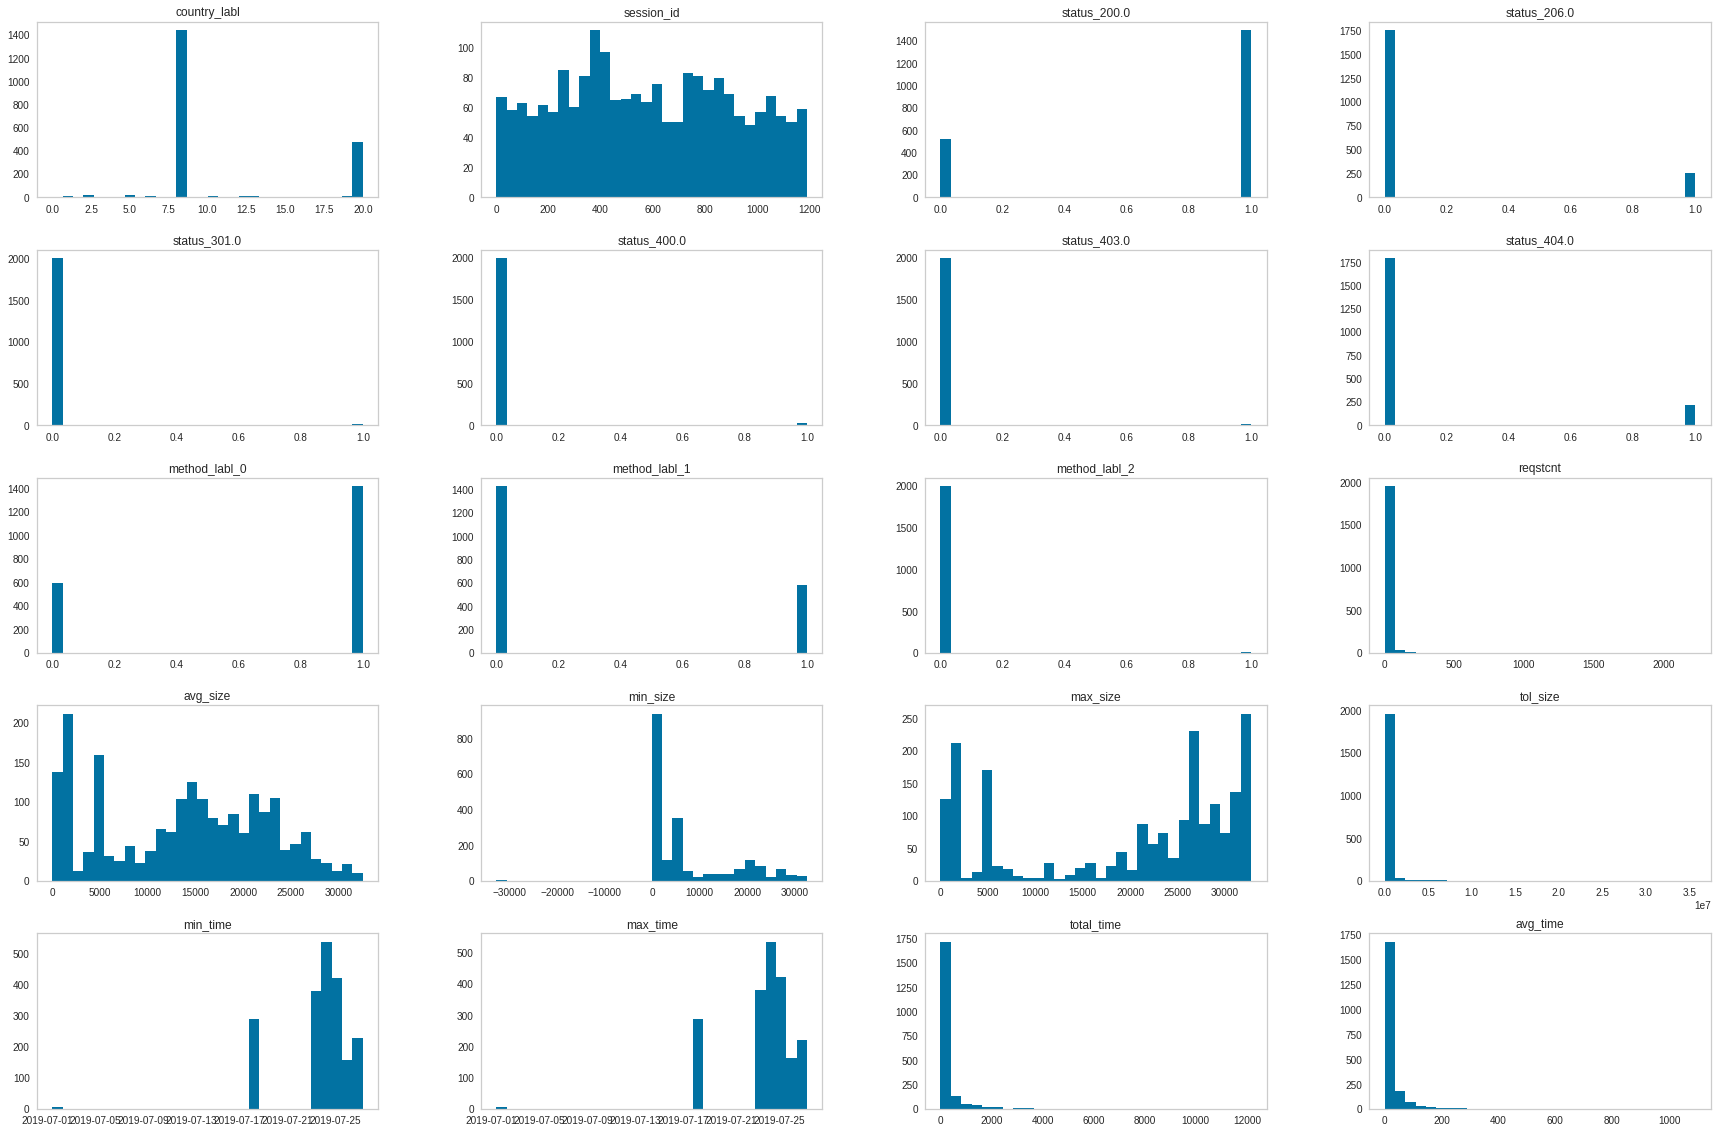

In [ ]:
df_feature.hist(bins = 30, figsize = (30,20), grid = False)
plt.show()

In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ip             2011 non-null   object        
 1   country_labl   2011 non-null   int64         
 2   detected       2011 non-null   object        
 3   session_id     2011 non-null   int64         
 4   status_200.0   2011 non-null   uint64        
 5   status_206.0   2011 non-null   uint64        
 6   status_301.0   2011 non-null   uint64        
 7   status_400.0   2011 non-null   uint64        
 8   status_403.0   2011 non-null   uint64        
 9   status_404.0   2011 non-null   uint64        
 10  method_labl_0  2011 non-null   uint64        
 11  method_labl_1  2011 non-null   uint64        
 12  method_labl_2  2011 non-null   uint64        
 13  reqstcnt       2011 non-null   int64         
 14  avg_size       2011 non-null   float64       
 15  min_size       2011 n

### Clustering the data

In [ ]:
## Column Selection  without the detected label

df_feature.columns

Index(['ip', 'country_labl', 'detected', 'session_id', 'status_200.0',
       'status_206.0', 'status_301.0', 'status_400.0', 'status_403.0',
       'status_404.0', 'method_labl_0', 'method_labl_1', 'method_labl_2',
       'reqstcnt', 'avg_size', 'min_size', 'max_size', 'tol_size', 'min_time',
       'max_time', 'total_time', 'avg_time'],
      dtype='object')

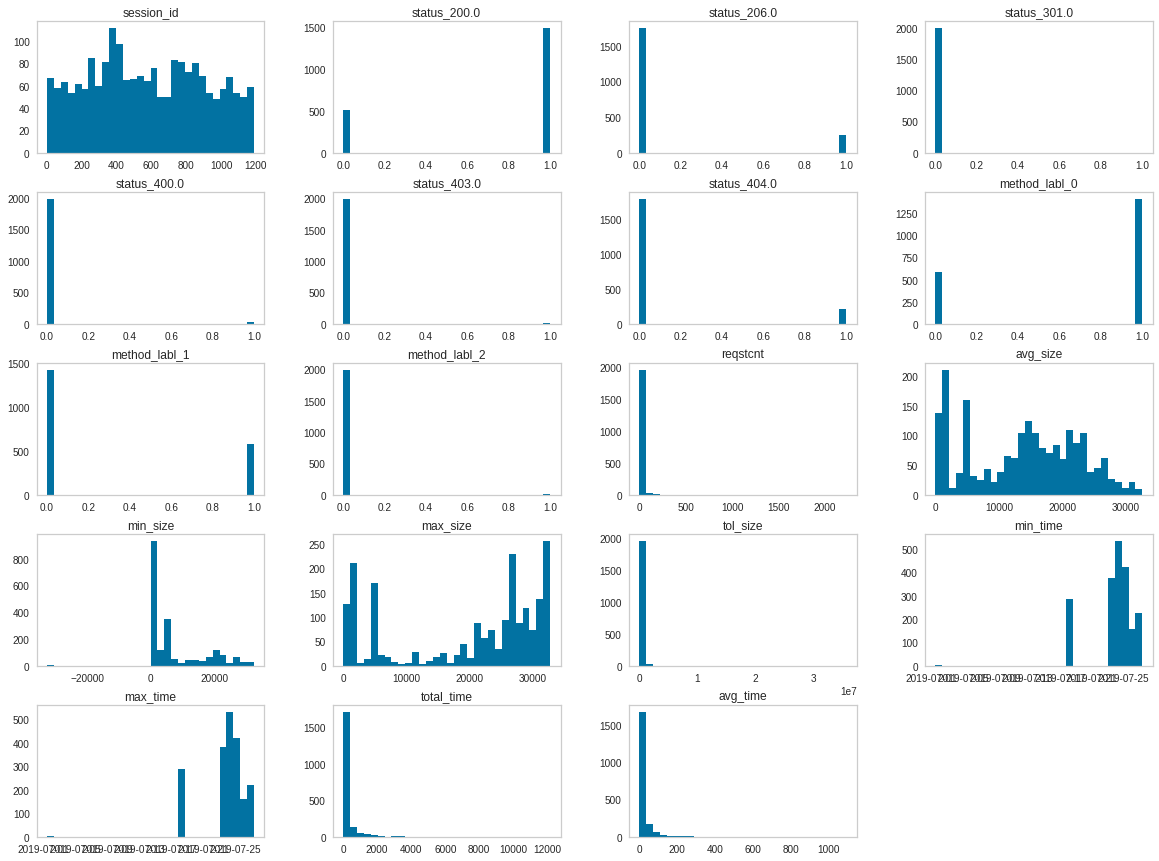

In [ ]:
df_feature.hist(bins = 30, figsize = (20,15), grid = False)
plt.show()

In [ ]:
df_clus=df_feature[['ip','country_labl','session_id', 'status_200.0', 'status_206.0',
       'status_301.0', 'status_400.0', 'status_403.0', 'status_404.0',
       'method_labl_0', 'method_labl_1', 'method_labl_2', 'reqstcnt',
       'avg_size', 'min_size', 'max_size', 'tol_size', 'min_time', 'max_time',
       'total_time', 'avg_time']]

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_clus.isna().sum()

ip               0
country_labl     0
session_id       0
status_200.0     0
status_206.0     0
status_301.0     0
status_400.0     0
status_403.0     0
status_404.0     0
method_labl_0    0
method_labl_1    0
method_labl_2    0
reqstcnt         0
avg_size         0
min_size         0
max_size         0
tol_size         0
min_time         0
max_time         0
total_time       0
avg_time         0
dtype: int64

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
# Get the position of categorical columns
cat_cols= ['ip','country_labl','session_id', 'status_200.0', 'status_206.0',
       'status_301.0', 'status_400.0', 'status_403.0', 'status_404.0',
       'method_labl_0', 'method_labl_1', 'method_labl_2']
       
catColumnsPos = [df_clus.columns.get_loc(col) for col in cat_cols]
print('Categorical columns           : {}'.format(cat_cols))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['ip', 'country_labl', 'session_id', 'status_200.0', 'status_206.0', 'status_301.0', 'status_400.0', 'status_403.0', 'status_404.0', 'method_labl_0', 'method_labl_1', 'method_labl_2']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
# Convert dataframe to matrix
dfMatrix = df_clus.to_numpy()
dfMatrix

array([['101.89.19.197', 2, 1086, ..., Timestamp('2019-07-26 17:01:30'),
        0.0, 0.0],
       ['101.91.60.109', 2, 984, ..., Timestamp('2019-07-25 10:44:59'),
        0.0, 0.0],
       ['101.91.60.11', 2, 1088, ..., Timestamp('2019-07-26 17:04:25'),
        0.0, 0.0],
       ...,
       ['91.122.91.6', 12, 1010, ..., Timestamp('2019-07-25 12:28:48'),
        0.0, 0.0],
       ['94.180.140.84', 12, 645, ..., Timestamp('2019-07-24 01:14:31'),
        0.0, 0.0],
       ['94.180.140.84', 12, 645, ..., Timestamp('2019-07-24 01:14:45'),
        16.0, 2.2857142857142856]], dtype=object)

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    print('hi')
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


hi


In [ ]:
cost

[]

In [ ]:
# Import module for data visualization
from plotnine import *
import plotnine

# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

ValueError: ignored

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [ ]:
# Cluster centorid
kprototype.cluster_centroids_
# Check the iteration of the clusters created
kprototype.n_iter_
# Check the cost of the clusters created
kprototype.cost_

109636627537191.78

In [ ]:
# Add the cluster to the dataframe original data frame
df_fnl['Cluster Labels'] = kprototype.labels_

In [ ]:
df_clus

,ip,new_sess,status,country_labl,method_labl,referer_labl,request_cnt,size_mean,size_tot,Cluster Labels
0,101.89.19.197,1,200.0,6,1,1329,1,5198.000000,5198.0,0
1,101.91.60.109,1,200.0,6,1,0,1,5198.000000,5198.0,0
2,101.91.60.11,1,200.0,6,0,1151,1,5198.000000,5198.0,0
3,101.91.60.110,1,200.0,6,0,23,1,5198.000000,5198.0,0
4,103.103.146.58,0,200.0,14,0,0,3,9308.666667,27926.0,0
...,...,...,...,...,...,...,...,...,...,...
5785,89.248.174.198,1,404.0,10,0,0,1,1059.000000,1059.0,0
5786,91.122.91.6,1,400.0,22,0,1347,1,981.000000,981.0,0
5787,94.180.140.84,0,200.0,22,0,21,6,11103.333333,66620.0,0
5788,94.180.140.84,0,200.0,22,1,21,1,3866.000000,3866.0,0


In [ ]:
# Order the cluster
df_fnl['Segment'] = df_fnl['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})


In [ ]:
df_fnl

,ip,new_sess,status,country_labl,detected_lbl,method_labl,referer_labl,request_cnt,size_mean,size_tot,date_min,date_max,Cluster Labels,Segment
0,101.89.19.197,1,200.0,6,2,1,1329,1,5198.000000,5198.0,2019-07-26 17:01:30,2019-07-26 17:01:30,0,First
1,101.91.60.109,1,200.0,6,2,1,0,1,5198.000000,5198.0,2019-07-25 10:44:59,2019-07-25 10:44:59,0,First
2,101.91.60.11,1,200.0,6,2,0,1151,1,5198.000000,5198.0,2019-07-26 17:04:25,2019-07-26 17:04:25,0,First
3,101.91.60.110,1,200.0,6,2,0,23,1,5198.000000,5198.0,2019-07-26 17:03:06,2019-07-26 17:03:06,0,First
4,103.103.146.58,0,200.0,14,0,0,0,3,9308.666667,27926.0,2019-07-25 20:47:41,2019-07-25 21:00:51,0,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,89.248.174.198,1,404.0,10,2,0,0,1,1059.000000,1059.0,2019-07-18 06:35:19,2019-07-18 06:35:19,0,First
5786,91.122.91.6,1,400.0,22,2,0,1347,1,981.000000,981.0,2019-07-25 12:28:48,2019-07-25 12:28:48,0,First
5787,94.180.140.84,0,200.0,22,2,0,21,6,11103.333333,66620.0,2019-07-24 01:14:31,2019-07-24 01:14:45,0,First
5788,94.180.140.84,0,200.0,22,2,1,21,1,3866.000000,3866.0,2019-07-24 01:14:31,2019-07-24 01:14:31,0,First


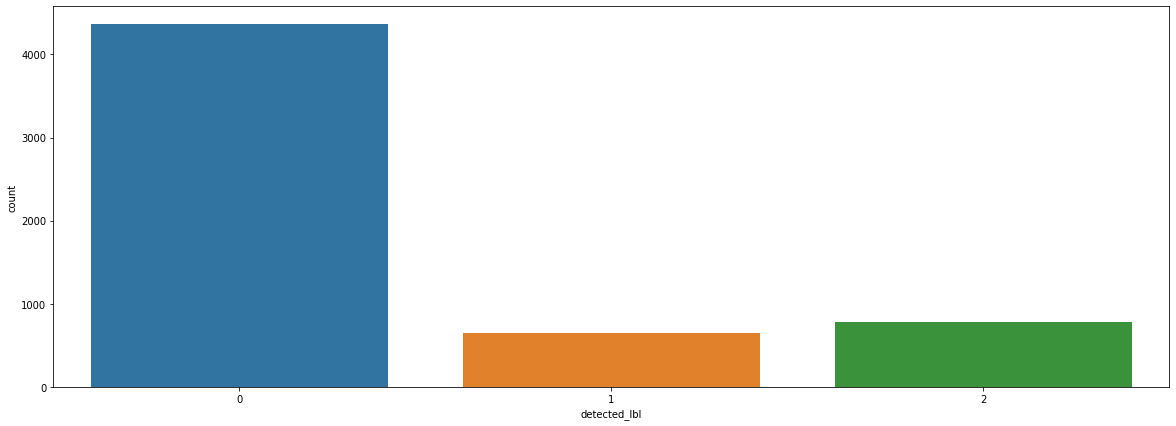

In [ ]:
#Top request methods 

plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = df_fnl, x = 'detected_lbl')

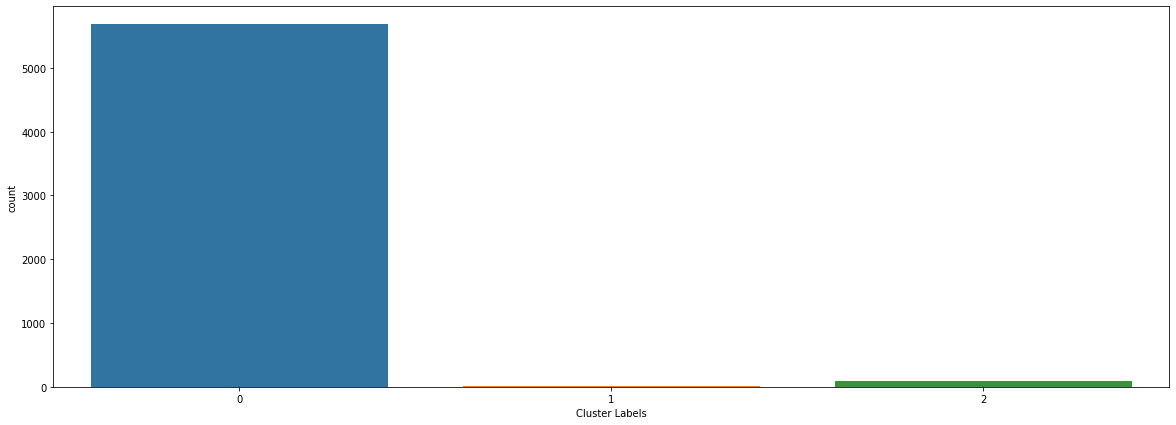

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = df_fnl, x = 'Cluster Labels')

## gaussian labelling on the Un labelled data

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture


In [ ]:
#Encode Cluster ip for GMM

df_clus['ip']= label_encoder.fit_transform(df_clus['ip'])

NameError: ignored

In [ ]:
# Convert dataframe to matrix
dfMatrix = df_clus.to_numpy()
dfMatrix

array([[1086, 1, 0, ..., Timestamp('2019-07-26 17:01:30'), 0.0, 0.0],
       [984, 1, 0, ..., Timestamp('2019-07-25 10:44:59'), 0.0, 0.0],
       [1088, 1, 0, ..., Timestamp('2019-07-26 17:04:25'), 0.0, 0.0],
       ...,
       [1010, 0, 0, ..., Timestamp('2019-07-25 12:28:48'), 0.0, 0.0],
       [645, 1, 0, ..., Timestamp('2019-07-24 01:14:31'), 0.0, 0.0],
       [645, 1, 0, ..., Timestamp('2019-07-24 01:14:45'), 16.0,
        2.2857142857142856]], dtype=object)

In [ ]:
# Suppose Data X is a 2-D Numpy array (One apple has two features, size and flavor)
GMM = GaussianMixture(n_components=3, random_state=0).fit(dfMatrix)

TypeError: ignored

In [ ]:
#predictions from gmm
labels = GMM.predict(dfMatrix)

In [ ]:
# Add the cluster to the dataframe original data frame
df_fnl['Gaussian Labels'] = labels

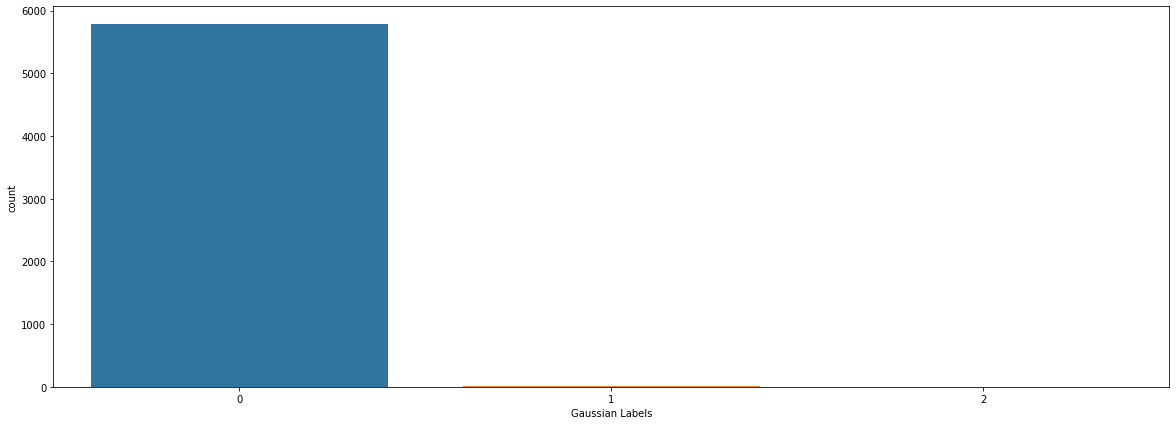

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = df_fnl, x = 'Gaussian Labels')

In [ ]:
df_fnl['Cluster Labels'].value_counts()

0    5681
2      98
1      11
Name: Cluster Labels, dtype: int64

In [ ]:
df_fnl['detected_lbl'].value_counts()

0    4360
2     782
1     648
Name: detected_lbl, dtype: int64

In [ ]:
df_fnl['Gaussian Labels'].value_counts()

0    5779
1      10
2       1
Name: Gaussian Labels, dtype: int64

In [ ]:
df_f[['detected_lbl','detected']].value_counts()

detected_lbl  detected 
0             SAFE         23933
1             DANGER        4377
2             SUSPECTED     2416
dtype: int64

In [ ]:
#Isolation forest


In [ ]:
from sklearn.ensemble import IsolationForest


In [ ]:
random_state = np.random.RandomState(42)

In [ ]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(dfMatrix)

print(model.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F9CFB0F2160, 'verbose': 0, 'warm_start': False}


In [ ]:
df_fnl['Isolation_score'] = model.decision_function(dfMatrix)

df_fnl['anomaly_score'] = model.predict(dfMatrix)

df_fnl[df_fnl['anomaly_score']==-1].head()

,ip,new_sess,status,country_labl,detected_lbl,method_labl,referer_labl,request_cnt,size_mean,size_tot,date_min,date_max,Isolation_score,anomaly_score
0,101.89.19.197,1,200.0,2,2,1,1328,1,5198.0000,5198.0,2019-07-26 17:01:30,2019-07-26 17:01:30,-0.102742,-1
1,101.91.60.109,1,200.0,2,2,1,0,1,5198.0000,5198.0,2019-07-25 10:44:59,2019-07-25 10:44:59,-0.110120,-1
2,101.91.60.11,1,200.0,2,2,0,1150,1,5198.0000,5198.0,2019-07-26 17:04:25,2019-07-26 17:04:25,-0.030771,-1
3,101.91.60.110,1,200.0,2,2,0,23,1,5198.0000,5198.0,2019-07-26 17:03:06,2019-07-26 17:03:06,-0.051434,-1
5,103.103.146.58,0,200.0,8,1,0,21,16,12431.1875,198899.0,2019-07-25 20:47:21,2019-07-26 15:15:17,-0.035856,-1


In [ ]:
s = setup(df_fnl,normalize = True)

iforest = create_model('iforest')



NameError: ignored

In [ ]:
#Assign anomaly labels to the data set



##Clustering using Pycaret

In [ ]:
#Encode Cluster ip for GMM

df_clus['ip']= label_encoder.fit_transform(df_clus['ip'])

In [ ]:
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country_labl   2011 non-null   int64         
 1   session_id     2011 non-null   int64         
 2   status_200.0   2011 non-null   uint64        
 3   status_206.0   2011 non-null   uint64        
 4   status_301.0   2011 non-null   uint64        
 5   status_400.0   2011 non-null   uint64        
 6   status_403.0   2011 non-null   uint64        
 7   status_404.0   2011 non-null   uint64        
 8   method_labl_0  2011 non-null   uint64        
 9   method_labl_1  2011 non-null   uint64        
 10  method_labl_2  2011 non-null   uint64        
 11  reqstcnt       2011 non-null   int64         
 12  avg_size       2011 non-null   float64       
 13  min_size       2011 non-null   int16         
 14  max_size       2011 non-null   int16         
 15  tol_size       2011 n

In [ ]:
df_clus.head()

,session_id,status_200.0,status_206.0,status_301.0,status_400.0,status_403.0,status_404.0,method_labl_0,method_labl_1,method_labl_2,reqstcnt,avg_size,min_size,max_size,tol_size,min_time,max_time,total_time,avg_time
0,1086,1,0,0,0,0,0,0,1,0,1,5198.000000,5198,5198,5198.0,2019-07-26 17:01:30,2019-07-26 17:01:30,0.0,0.000000
1,984,1,0,0,0,0,0,0,1,0,1,5198.000000,5198,5198,5198.0,2019-07-25 10:44:59,2019-07-25 10:44:59,0.0,0.000000
2,1088,1,0,0,0,0,0,1,0,0,1,5198.000000,5198,5198,5198.0,2019-07-26 17:04:25,2019-07-26 17:04:25,0.0,0.000000
3,1087,1,0,0,0,0,0,1,0,0,1,5198.000000,5198,5198,5198.0,2019-07-26 17:03:06,2019-07-26 17:03:06,0.0,0.000000
4,1050,0,1,0,0,0,0,0,1,0,12,15934.916667,386,28873,191219.0,2019-07-25 21:09:46,2019-07-25 21:44:15,2069.0,172.416667


In [ ]:
cluster = setup(df_clus, session_id = 6718,numeric_features= ['status_200.0', 'status_206.0',
       'status_301.0', 'status_400.0', 'status_403.0', 'status_404.0',
       'method_labl_0', 'method_labl_1', 'method_labl_2', 'reqstcnt',
       'avg_size', 'min_size', 'max_size', 'tol_size',
       'total_time', 'avg_time'])

,Description,Value
0,session_id,6718
1,Original Data,"(2011, 21)"
2,Missing Values,False
3,Numeric Features,18
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2011, 628)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['status_200.0',
                                                          'status_206.0',
                                                          'status_301.0',
                                                          'status_400.0',
                                                          'status_403.0',
                                                          'status_404.0',
                                                          'method_labl_0',
                                                          'method_labl_1',
                         

In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,10639.2216,0.3154,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6718, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


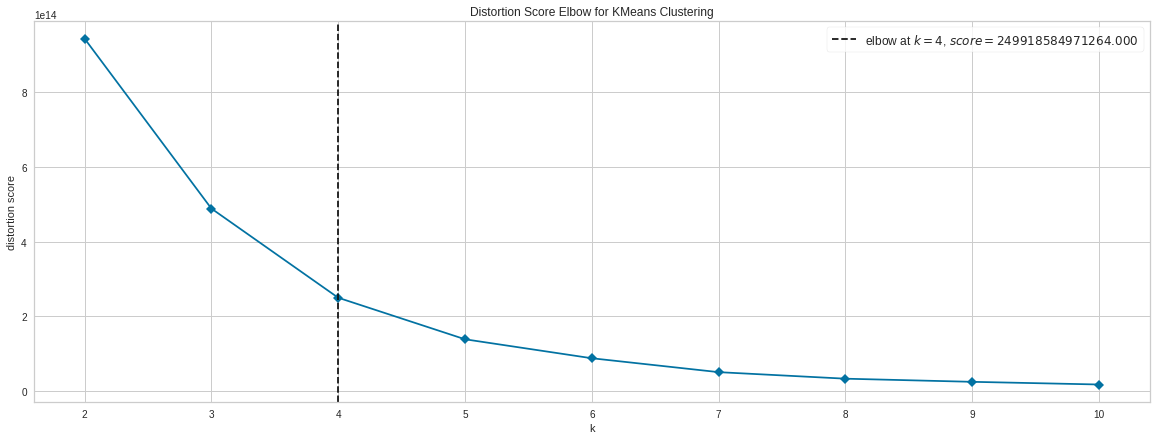

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(model, 'elbow')

In [ ]:
model = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,10639.2216,0.3154,0,0,0


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6718, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
plot_model(model, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
save_model(model, 'clustering_model')
results = assign_model(model)
results.head(10)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6718, tol=0.0001, verbose=0), model_name=clustering_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['status_200.0',
                                                          'status_206.0',
                                                          'status_301.0',
                                                          'status_400.0',
                                                          'status_403.0',
                                                          'st

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6718, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(2011, 22)
INFO:logs:assign_model() succesfully completed......................................


,ip,country_labl,session_id,status_200.0,status_206.0,status_301.0,status_400.0,status_403.0,status_404.0,method_labl_0,...,reqstcnt,avg_size,min_size,max_size,tol_size,min_time,max_time,total_time,avg_time,Cluster
0,101.89.19.197,2,1086,1,0,0,0,0,0,0,...,1,5198.000000,5198,5198,5198.0,2019-07-26 17:01:30,2019-07-26 17:01:30,0.0,0.000000,Cluster 0
1,101.91.60.109,2,984,1,0,0,0,0,0,0,...,1,5198.000000,5198,5198,5198.0,2019-07-25 10:44:59,2019-07-25 10:44:59,0.0,0.000000,Cluster 0
2,101.91.60.11,2,1088,1,0,0,0,0,0,1,...,1,5198.000000,5198,5198,5198.0,2019-07-26 17:04:25,2019-07-26 17:04:25,0.0,0.000000,Cluster 0
3,101.91.60.110,2,1087,1,0,0,0,0,0,1,...,1,5198.000000,5198,5198,5198.0,2019-07-26 17:03:06,2019-07-26 17:03:06,0.0,0.000000,Cluster 0
4,103.103.146.58,8,1050,0,1,0,0,0,0,0,...,12,15934.916667,386,28873,191219.0,2019-07-25 21:09:46,2019-07-25 21:44:15,2069.0,172.416667,Cluster 0
5,103.103.146.58,8,1050,0,1,0,0,0,0,1,...,399,17461.912281,31,32688,6967303.0,2019-07-25 20:48:38,2019-07-25 21:44:19,3341.0,8.373434,Cluster 2
6,103.103.146.58,8,1050,1,0,0,0,0,0,0,...,3,15037.333333,7610,29170,45112.0,2019-07-25 20:48:36,2019-07-25 21:43:09,3273.0,1091.000000,Cluster 0
7,103.103.146.58,8,1050,1,0,0,0,0,0,1,...,124,17211.290323,84,32626,2134200.0,2019-07-25 20:47:20,2019-07-25 21:46:50,3570.0,28.790323,Cluster 0
8,103.103.146.58,8,1051,1,0,0,0,0,0,0,...,1,7426.000000,7426,7426,7426.0,2019-07-26 15:15:17,2019-07-26 15:15:17,0.0,0.000000,Cluster 0
9,103.103.146.58,8,1051,1,0,0,0,0,0,1,...,42,14080.809524,84,31832,591394.0,2019-07-26 15:14:46,2019-07-26 15:20:19,333.0,7.928571,Cluster 0


In [ ]:
results['Cluster'].value_counts()

Cluster 0    1949
Cluster 3      50
Cluster 2       8
Cluster 1       2
Cluster 4       2
Name: Cluster, dtype: int64

In [ ]:
results['Cluster'].value_counts()

Cluster 0    1991
Cluster 2      15
Cluster 3       3
Cluster 1       2
Name: Cluster, dtype: int64

In [ ]:
results['session_id'].value_counts()

389     8
378     8
254     7
402     7
391     6
       ..
667     1
668     1
1082    1
763     1
1086    1
Name: session_id, Length: 1190, dtype: int64

In [ ]:
## Join  cluster labels with lables detected in cluster

compare_df=pd.merge(df_f, results[['Cluster','session_id','ip']].drop_duplicates(), how="inner", on=["session_id",'ip'])

In [ ]:
df_f.session_id.value_counts()


418     4325
378     2245
389     1376
379     1375
1184     793
        ... 
686        1
689        1
697        1
681        1
1175       1
Name: session_id, Length: 1190, dtype: int64

In [ ]:
compare_df.shape

(48630, 19)

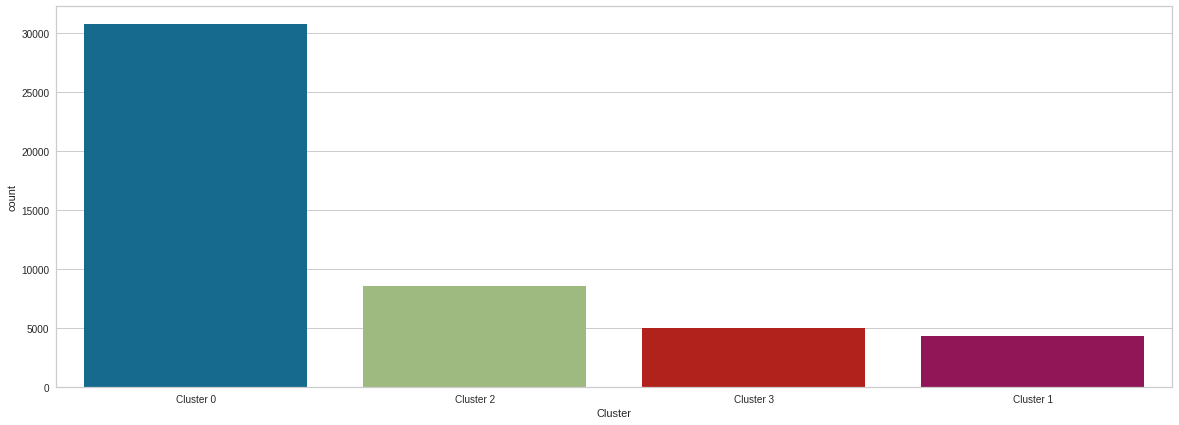

In [ ]:
#Top request methods 

plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = compare_df, x = 'Cluster')

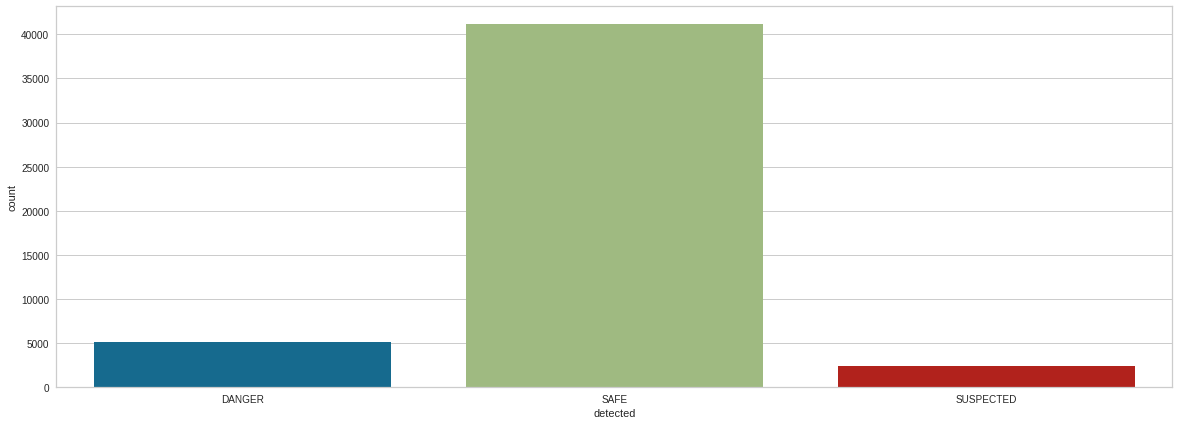

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.countplot(data = compare_df, x = 'detected')

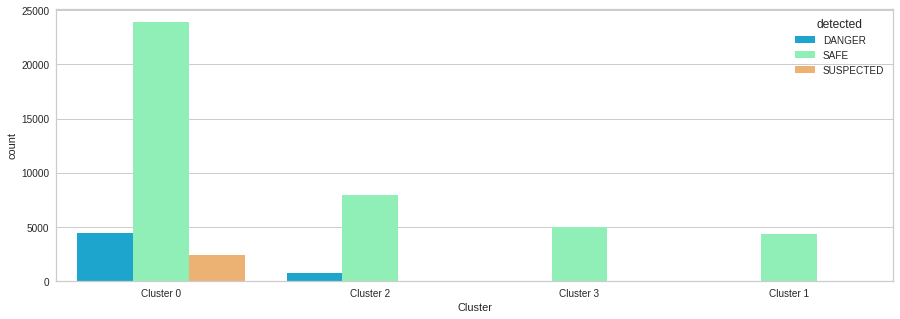

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Cluster',hue='detected',data=compare_df,palette='rainbow')

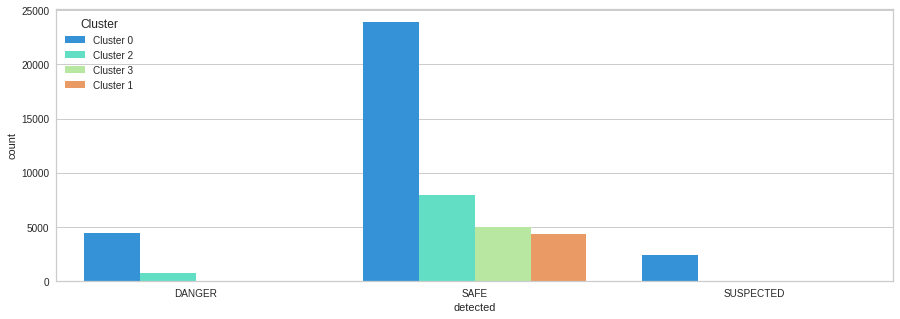

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='detected',hue='Cluster',data=compare_df,palette='rainbow')

## Labelling Manual and from the data

In [ ]:
#If marked as safe and is appearing in cluster 0 ,mark as Safe
#If marked anything else mark it as unsafe to be validated.
#0 - Suspicious
#1 - Non Suspricious

compare_df['label_auto_detect']  = np.where((compare_df['detected']=='SAFE') & (compare_df['Cluster']=='Cluster 0'), '1', '0') 


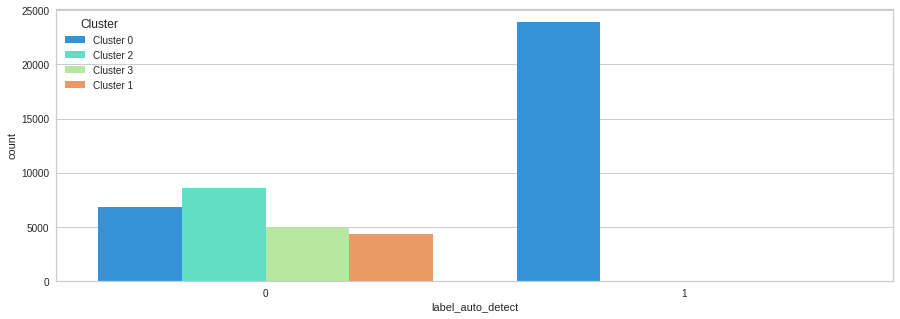

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='label_auto_detect',hue='Cluster',data=compare_df,palette='rainbow')

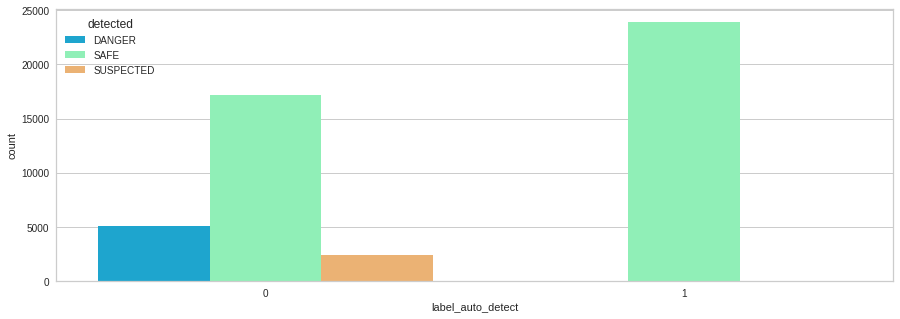

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='label_auto_detect',hue='detected',data=compare_df,palette='rainbow')

In [ ]:
compare_df.isna().sum()

ip                0
datetime          0
gmt               0
request           0
status            0
size              0
referer          47
browser          47
country           0
detected          0
refdf_0         136
refdf_1         136
refdf_2         568
referer_labl      0
country_labl      0
detected_lbl      0
method_labl       0
session_id        0
Cluster           0
dtype: int64

In [ ]:
compare_df.label_auto_detect.value_counts()

0    24697
1    23933
Name: label_auto_detect, dtype: int64

In [ ]:
compare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133905 entries, 0 to 133904
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ip            133905 non-null  object        
 1   datetime      133905 non-null  datetime64[ns]
 2   gmt           133905 non-null  object        
 3   request       133905 non-null  object        
 4   status        133905 non-null  object        
 5   size          133905 non-null  int16         
 6   referer       133830 non-null  object        
 7   browser       133830 non-null  object        
 8   country       133905 non-null  object        
 9   detected      133905 non-null  object        
 10  refdf_0       133721 non-null  object        
 11  refdf_1       133721 non-null  object        
 12  refdf_2       132437 non-null  object        
 13  referer_labl  133905 non-null  int64         
 14  country_labl  133905 non-null  int64         
 15  detected_lbl  133

In [ ]:
compare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48630 entries, 0 to 48629
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ip                 48630 non-null  object        
 1   datetime           48630 non-null  datetime64[ns]
 2   gmt                48630 non-null  object        
 3   request            48630 non-null  object        
 4   status             48630 non-null  object        
 5   size               48630 non-null  int16         
 6   referer            48583 non-null  object        
 7   browser            48583 non-null  object        
 8   country            48630 non-null  object        
 9   detected           48630 non-null  object        
 10  refdf_0            48494 non-null  object        
 11  refdf_1            48494 non-null  object        
 12  refdf_2            48062 non-null  object        
 13  referer_labl       48630 non-null  int64         
 14  countr

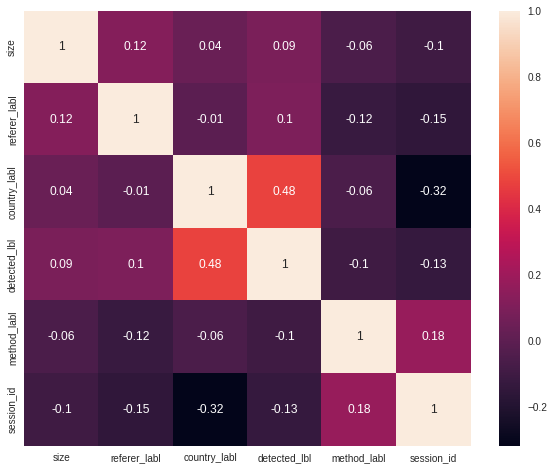

In [ ]:
#High correlation between country and dectection is observed -df_fnl

plt.figure(figsize=(10, 8))
sns.heatmap(compare_df.corr().round(decimals=2), annot=True)
plt.show()

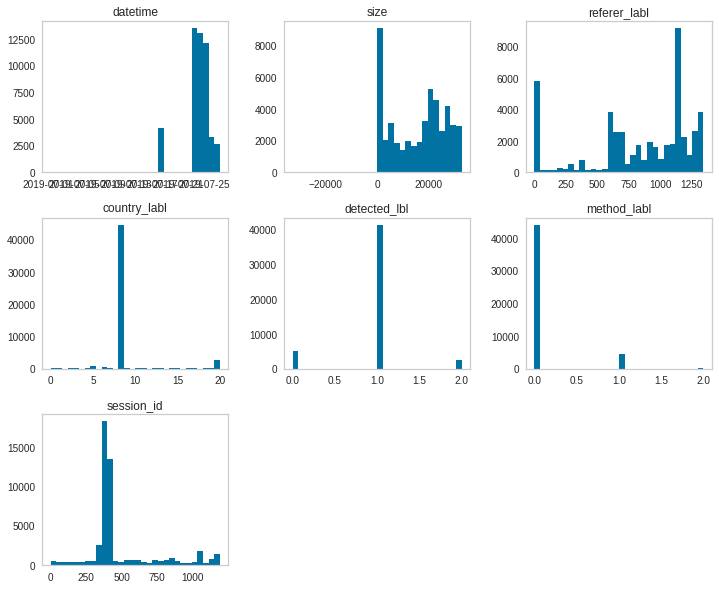

In [ ]:
compare_df.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

In [ ]:
compare_df.describe(include='all')

,ip,datetime,gmt,request,status,size,referer,browser,country,detected,refdf_0,refdf_1,refdf_2,referer_labl,country_labl,detected_lbl,method_labl,session_id,Cluster,label_auto_detect
count,48630,48630,48630,48630,48630,48630.000000,48583,48583,48630,48630,48494,48494,48062,48630.000000,48630.000000,48630.000000,48630.000000,48630.000000,48630,48630
unique,542,15754,1,5258,6,NaN,1344,232,21,3,2,5171,3,NaN,NaN,NaN,NaN,NaN,4,2
top,180.178.99.174,2019-07-24 09:54:58,+0700],GET /bkd_baru/assets/file/Pendidikan-min.pdf HTTP/1.1,200.0,NaN,http://universitas.com/bkd_baru/home,Mozilla/5.0 (Windows NT 6.3; rv:68.0) Gecko/20100101 Firefox/68.0,Indonesia,SAFE,GET,/bkd_baru/assets/file/Pendidikan-min.pdf,HTTP/1.1,NaN,NaN,NaN,NaN,NaN,Cluster 0,0
freq,31351,105,48630,1443,34475,NaN,6452,6247,44522,41141,44014,1159,48009,NaN,NaN,NaN,NaN,NaN,30726,24697
first,NaN,2019-07-01 10:54:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-07-27 08:06:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,15799.100905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,841.511372,8.578511,0.945363,0.097717,486.263603,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,10568.189727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409.696962,2.750691,0.388610,0.306209,243.622941,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-32768.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,5198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622.000000,8.000000,1.000000,0.000000,378.000000,NaN,NaN


### Classifier

In [ ]:
from pycaret.classification import *
s = setup(data = compare_df.drop(['','']), target = 'default', session_id=123)

In [ ]:
X= compare_df.drop(columns=['country','detected','datetime','Cluster','detected_lbl','gmt','request','referer','browser','refdf_0','refdf_1','refdf_2'])

In [ ]:
X

,ip,status,size,referer_labl,country_labl,method_labl,session_id,label_auto_detect
0,114.125.221.132,200.0,12133,677,8,0,1,0
1,114.125.221.132,200.0,15491,678,8,0,1,0
2,114.125.221.132,200.0,16305,677,8,1,1,0
3,114.125.221.132,404.0,1130,0,8,0,1,0
4,114.125.221.132,200.0,1735,0,8,0,1,0
...,...,...,...,...,...,...,...,...
48625,114.124.214.88,200.0,452,104,8,2,1122,1
48626,114.124.214.88,200.0,18202,104,8,2,1122,1
48627,114.124.212.233,200.0,1892,104,8,2,1190,1
48628,114.124.212.233,200.0,22879,104,8,2,1190,1


In [ ]:
X.columns

Index(['ip', 'status', 'size', 'referer_labl', 'country_labl', 'method_labl',
       'session_id', 'label_auto_detect'],
      dtype='object')

In [ ]:
X=pd.get_dummies(X, columns = [ 'status', 'country_labl', 'method_labl'])

In [ ]:
X.head(10)

,ip,size,referer_labl,session_id,label_auto_detect,status_200.0,status_206.0,status_301.0,status_400.0,status_403.0,...,country_labl_14,country_labl_15,country_labl_16,country_labl_17,country_labl_18,country_labl_19,country_labl_20,method_labl_0,method_labl_1,method_labl_2
0,114.125.221.132,12133,677,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,114.125.221.132,15491,678,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,114.125.221.132,16305,677,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,114.125.221.132,1130,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,114.125.221.132,1735,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,114.125.221.132,12421,680,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,114.125.207.5,360,0,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,114.125.207.5,2416,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,114.124.140.168,31568,681,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,114.124.140.168,10663,684,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.shape

(48630, 35)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48630 entries, 0 to 48629
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ip                 48630 non-null  object
 1   size               48630 non-null  int16 
 2   referer_labl       48630 non-null  int64 
 3   session_id         48630 non-null  int64 
 4   label_auto_detect  48630 non-null  object
 5   status_200.0       48630 non-null  uint8 
 6   status_206.0       48630 non-null  uint8 
 7   status_301.0       48630 non-null  uint8 
 8   status_400.0       48630 non-null  uint8 
 9   status_403.0       48630 non-null  uint8 
 10  status_404.0       48630 non-null  uint8 
 11  country_labl_0     48630 non-null  uint8 
 12  country_labl_1     48630 non-null  uint8 
 13  country_labl_2     48630 non-null  uint8 
 14  country_labl_3     48630 non-null  uint8 
 15  country_labl_4     48630 non-null  uint8 
 16  country_labl_5     48630 non-null  uint8

In [ ]:
X.columns

Index(['ip', 'size', 'referer_labl', 'session_id', 'label_auto_detect',
       'status_200.0', 'status_206.0', 'status_301.0', 'status_400.0',
       'status_403.0', 'status_404.0', 'country_labl_0', 'country_labl_1',
       'country_labl_2', 'country_labl_3', 'country_labl_4', 'country_labl_5',
       'country_labl_6', 'country_labl_7', 'country_labl_8', 'country_labl_9',
       'country_labl_10', 'country_labl_11', 'country_labl_12',
       'country_labl_13', 'country_labl_14', 'country_labl_15',
       'country_labl_16', 'country_labl_17', 'country_labl_18',
       'country_labl_19', 'country_labl_20', 'method_labl_0', 'method_labl_1',
       'method_labl_2'],
      dtype='object')

In [ ]:
from pycaret.classification import *
s = setup(data = X.drop(columns=['ip']), target = 'label_auto_detect', session_id=123,numeric_features= ['size'],categorical_features=['status_200.0', 'status_206.0', 'status_301.0', 'status_400.0',
       'status_403.0', 'status_404.0', 'country_labl_0', 'country_labl_1',
       'country_labl_2', 'country_labl_3', 'country_labl_4', 'country_labl_5',
       'country_labl_6', 'country_labl_7', 'country_labl_8', 'country_labl_9',
       'country_labl_10', 'country_labl_11', 'country_labl_12',
       'country_labl_13', 'country_labl_14', 'country_labl_15',
       'country_labl_16', 'country_labl_17', 'country_labl_18',
       'country_labl_19', 'country_labl_20', 'method_labl_0', 'method_labl_1',
       'method_labl_2'])


,Description,Value
0,session_id,123
1,Target,label_auto_detect
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(48630, 34)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['status_200.0',
                                                            'status_206.0',
                                                            'status_301.0',
                                                            'status_400.0',
                                                            'status_403.0',
                                                            'status_404.0',
                                                            'country_labl_0',
                                                            'country_labl_1',
                                                            'country_labl_2',
                                                            'country_labl_3',
                                                            'country_l

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7118,0.8172,0.7106,0.7064,0.7062,0.4235,0.4262,0.986
gbc,Gradient Boosting Classifier,0.7116,0.8225,0.6922,0.7129,0.7014,0.4227,0.4240,2.906
lightgbm,Light Gradient Boosting Machine,0.6813,0.7995,0.6351,0.6902,0.6613,0.3614,0.3627,0.454
ridge,Ridge Classifier,0.6792,0.0000,0.4519,0.8094,0.5795,0.3524,0.3919,0.051
lda,Linear Discriminant Analysis,0.6790,0.7697,0.4498,0.8111,0.5783,0.3520,0.3922,0.217
lr,Logistic Regression,0.6325,0.6937,0.6134,0.6353,0.6189,0.2645,0.2686,0.727
knn,K Neighbors Classifier,0.5917,0.6769,0.5457,0.5902,0.5670,0.1819,0.1825,0.530
dt,Decision Tree Classifier,0.5864,0.5887,0.4879,0.5950,0.5361,0.1695,0.1722,0.129
nb,Naive Bayes,0.5806,0.7179,0.9864,0.5393,0.6974,0.1745,0.2903,0.059
et,Extra Trees Classifier,0.5777,0.5616,0.4988,0.5802,0.5364,0.1526,0.1541,3.042


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#Now Trying with Nueral Network models

In [ ]:
numeric_list = X.select_dtypes(include=[np.number]).columns
X[numeric_list] = X[numeric_list].astype(np.float32)
X['label_auto_detect'] = X['label_auto_detect'].astype(np.float32)

In [ ]:
from sklearn.model_selection import train_test_split
data= X.drop(columns=['ip'])
y= X['label_auto_detect']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38904, 34), (9726, 34), (38904,), (9726,))

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                700       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1024)              11264     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                        

In [ ]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/30
2594/2594 [==============================] - 13s 5ms/step - loss: 0.6945 - accuracy: 0.5043 - val_loss: 0.6982 - val_accuracy: 0.4966
Epoch 2/30
2594/2594 [==============================] - 12s 5ms/step - loss: 0.6949 - accuracy: 0.5038 - val_loss: 0.7066 - val_accuracy: 0.4969
Epoch 3/30
2594/2594 [==============================] - 10s 4ms/step - loss: 0.6945 - accuracy: 0.5064 - val_loss: 0.7097 - val_accuracy: 0.4969
Epoch 4/30
2594/2594 [==============================] - 10s 4ms/step - loss: 0.6943 - accuracy: 0.5081 - val_loss: 0.6989 - val_accuracy: 0.5034
Epoch 5/30
2594/2594 [==============================] - 10s 4ms/step - loss: 0.6946 - accuracy: 0.5024 - val_loss: 0.7045 - val_accuracy: 0.4969
Epoch 6/30
2594/2594 [==============================] - 10s 4ms/step - loss: 0.6942 - accuracy: 0.5041 - val_loss: 0.6943 - val_accuracy: 0.4969
Epoch 7/30
2594/2594 [==============================] - 10s 4ms/step - loss: 0.6944 - accuracy: 0.5042 - val_loss: 0.6998 - val_ac

In [ ]:
X.select_dtypes(include=[np.number]).columns

Index(['size', 'referer_labl', 'session_id', 'status_200.0', 'status_206.0',
       'status_301.0', 'status_400.0', 'status_403.0', 'status_404.0',
       'country_labl_0', 'country_labl_1', 'country_labl_2', 'country_labl_3',
       'country_labl_4', 'country_labl_5', 'country_labl_6', 'country_labl_7',
       'country_labl_8', 'country_labl_9', 'country_labl_10',
       'country_labl_11', 'country_labl_12', 'country_labl_13',
       'country_labl_14', 'country_labl_15', 'country_labl_16',
       'country_labl_17', 'country_labl_18', 'country_labl_19',
       'country_labl_20', 'method_labl_0', 'method_labl_1', 'method_labl_2'],
      dtype='object')

In [ ]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)



def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

tensorboard_callback = keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq = 1)

file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

def plot_to_image(figure):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

def log_confusion_matrix(epoch, logs):
    
    # Use the model to predict the values from the test_images.
    test_pred_raw = model.predict(test_images)
    
    test_pred = np.argmax(test_pred_raw, axis=1)
    
    # Calculate the confusion matrix using sklearn.metrics
    cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
    
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)


#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test),callbacks=[es,tensorboard_callback, cm_callback])

Epoch 1/20
1216/1216 [==============================] - 51s 39ms/step - loss: 0.0751 - accuracy: 0.9528 - val_loss: 0.0074 - val_accuracy: 0.9999
Epoch 2/20
1216/1216 [==============================] - 46s 38ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 0.9999
Epoch 2: early stopping


In [ ]:
import io
import itertools
import numpy as np
import sklearn.metrics
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

from tensorflow import keras
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)




# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)


#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test),callbacks=[es])

Epoch 1/20
1216/1216 [==============================] - 53s 41ms/step - loss: 0.0801 - accuracy: 0.9493 - val_loss: 0.0069 - val_accuracy: 0.9998
Epoch 2/20
1216/1216 [==============================] - 50s 41ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.0014 - val_accuracy: 0.9999
Epoch 2: early stopping


In [ ]:
score, acc = regressor.evaluate(X_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

304/304 [==============================] - 3s 11ms/step - loss: 0.0014 - accuracy: 0.9999
Test score: 0.0013610469177365303
Test accuracy: 0.9998971819877625


In [ ]:
# Evaluating confusion matrix
y_pred=regressor.predict(X_test)

print(y_pred)

[[ 1.0468836 ]
 [ 1.0466089 ]
 [-0.02118334]
 ...
 [ 1.0466063 ]
 [-0.02117752]
 [ 1.0466079 ]]


In [ ]:
np.round(y_pred)

array([[ 1.],
       [ 1.],
       [-0.],
       ...,
       [ 1.],
       [-0.],
       [ 1.]], dtype=float32)

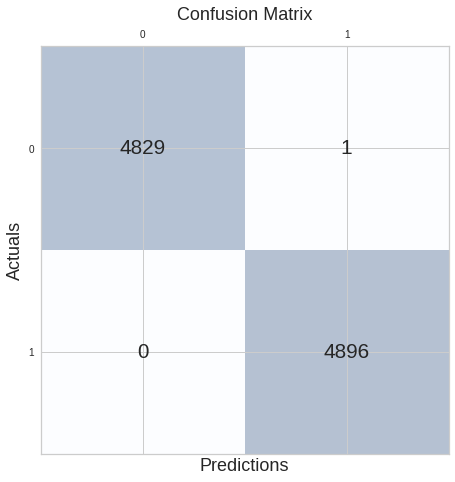

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=np.abs(np.round(y_pred)))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
len(y_pred)

9726

In [ ]:
len(y_test)

9726

AttributeError: ignored

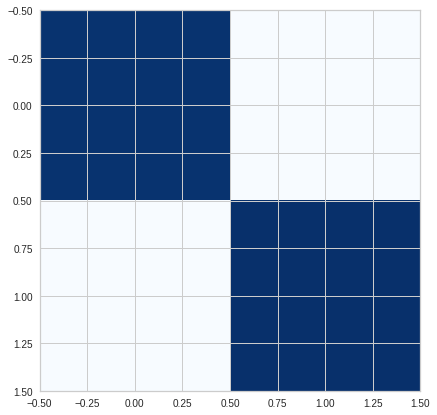

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred=regressor.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=res, display_labels=['Safe','Suspect'])

disp.plot(cmap=plt.cm.Blues)
plt.show()